# Time Series Analysis

## Load Libraries

In [1]:
#load Libraries
import pandas as pd
import numpy as np
import seaborn as seaborn
import matplotlib.pyplot as plt
import matplotlib as mp1
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import folium
from sklearn import metrics
#from mpl_toolkits.basemap import Basemap
from sklearn import metrics
import itertools
import os

## Load Sales Data

In [2]:
## Define a function to load all the files from a specific folder
def loadFiles(myPath):
    a=1
    salesFilesPath = [x for x in os.listdir(myPath)]
    
    for dataFile in salesFilesPath:
        print("Loading file: " + dataFile)
        tmpSales_df = pd.read_csv(myPath + "\\" + dataFile,low_memory=False)
        if a == 1 :
            sales_df = tmpSales_df
            a=0
            #print("Stored")
        else:
            sales_df = sales_df.append(tmpSales_df, ignore_index=True)
            #print("Append")
    return sales_df
    
salesTs_df=loadFiles("C:\\Users\\Eduardo Cantu\\Documents\\Masters\\CapstoneA\\Data\\JupyterNotebooks\\SMU_Capstone\\Data")

Loading file: Sales_Data_1.1.09_ 12.31.09.csv
Loading file: Sales_Data_1.1.10_ 12.31.10.csv
Loading file: Sales_Data_1.1.11_ 12.31.11.csv
Loading file: Sales_Data_1.1.12_ 12.31.12.csv
Loading file: Sales_Data_1.1.13_ 12.31.13.csv
Loading file: Sales_Data_1.1.14_ 12.31.14.csv
Loading file: Sales_Data_1.1.15_ 12.31.15.csv
Loading file: Sales_Data_1.1.16_ 12.31.16.csv
Loading file: Sales_Data_1.1.17_ 12.31.17.csv
Loading file: Sales_Data_1.1.18_ 12.31.18.csv


## EDA Analysis
### Data Types

In [3]:
salesTs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 539867 entries, 0 to 539866
Data columns (total 24 columns):
Invoice#         539855 non-null object
Invoice Type     528838 non-null object
Customer#        539855 non-null object
Customer Name    539852 non-null object
SO#              455396 non-null object
Ship Address     538609 non-null object
Ship Zipcode     455843 non-null object
Fab Mat Cost     539867 non-null object
FGHO Mat Cost    539867 non-null float64
BOL              537300 non-null object
Freight          539866 non-null float64
Location         539854 non-null object
Ship Date        539866 non-null object
Master#          539783 non-null object
Description      539843 non-null object
Qty              539865 non-null float64
Price Descrip    539681 non-null object
SRV              539865 non-null object
FGHO             539865 non-null object
Price each       539865 non-null float64
MaterialCost     539865 non-null float64
HT Lumber        539865 non-null object
Labo

#### Features of interest
__Ship Date__: This is to be use as the time component  
__Price each__: This can be aggregated by date as cashflow or income per date

#### Calculated Fields

In [4]:
# itemMargin  -- Gross Margin
# 'Price each' - 'MaterialCost'
salesTs_df['itemMargin'] =salesTs_df['Qty'] * (salesTs_df['Price each'] - salesTs_df['MaterialCost'])
salesTs_df['percentMargin'] =100*(salesTs_df['Qty'] * (salesTs_df['Price each'] - salesTs_df['MaterialCost'])) / (salesTs_df['Qty'] * (salesTs_df['Price each']))






### Remove Duplicates
_Evaluate if these duplicates are valid or not before deleting them_

In [5]:
salesTs_df.head()

,Invoice#,Invoice Type,Customer#,Customer Name,SO#,Ship Address,Ship Zipcode,Fab Mat Cost,FGHO Mat Cost,BOL,...,Price Descrip,SRV,FGHO,Price each,MaterialCost,HT Lumber,Labor,Release Type,itemMargin,percentMargin
0,A75545,All Other,A15216,Applied Materials- Inc - Crating,NaN,Sales Order Number Hours,NaN,0,0.0,NaN,...,pcs,False,False,55.00,0.000,False,0.000,NaN,2200.00,100.000000
1,W225343,HT Lumber,210,York International,W84192,5005 Interstate Dr- North,73069,401.33,0.0,W79753,...,pcs,False,False,16.43,9.060,True,3.263,Blanket Order,147.40,44.856969
2,W225343,HT Lumber,210,York International,W84179,5005 Interstate Dr- North,73069,401.33,0.0,W79753,...,pcs,False,False,42.52,22.013,True,11.475,Blanket Order,205.07,48.229069
3,W225344,HT Lumber,210,York International,W99801,5005 Interstate Dr- North,73069,680.54,0.0,W79754,...,pcs,False,False,131.93,63.585,True,6.300,Single Shipment,136.69,51.803987
4,W225344,HT Lumber,210,York International,W100090,5005 Interstate Dr- North,73069,680.54,0.0,W79754,...,pcs,False,False,194.00,101.845,False,21.938,Single Shipment,184.31,47.502577


In [6]:
#Print shape before duplicate removal
print("Data Shape before duplicate Removal:", salesTs_df.shape)

Data Shape before duplicate Removal: (539867, 26)


In [7]:
# Select duplicate rows except first occurrence based on all columns
duplicateRowsDF = salesTs_df[salesTs_df.duplicated()]
 
print("Duplicate Rows except first occurrence based on all columns are :")
print(duplicateRowsDF.count())

Duplicate Rows except first occurrence based on all columns are :
Invoice#         1297
Invoice Type     1266
Customer#        1297
Customer Name    1297
SO#              1258
Ship Address     1296
Ship Zipcode     1262
Fab Mat Cost     1300
FGHO Mat Cost    1300
BOL              1284
Freight          1300
Location         1297
Ship Date        1300
Master#          1300
Description      1300
Qty              1300
Price Descrip    1300
SRV              1300
FGHO             1300
Price each       1300
MaterialCost     1300
HT Lumber        1300
Labor            1300
Release Type      644
itemMargin       1300
percentMargin    1296
dtype: int64


In [8]:
## Section to Delete the duplicates from the main dataset
salesTs_df=salesTs_df.drop_duplicates()

In [9]:
salesTs_df.shape

(538567, 26)

### Data Description

#### Categorical Information
Observations from the data:
    * There are 3922 rows with no date. These rows can be deleted.  
    * SRV and FGHO fields can be removed. All the values are False
    

In [10]:
# Describe the Categorical Objects
list_include = ['object']
salesTs_df.describe(include=list_include).T

,count,unique,top,freq
Invoice#,538558,253975,W272894,88
Invoice Type,527572,13,All Other,231645
Customer#,538558,1289,A15216,80489
Customer Name,538555,1407,Applied Materials- Inc - Crating,80489
SO#,454138,154226,W108342,1449
Ship Address,537313,11787,76 N. Meridian Avenue,49886
Ship Zipcode,454581,2185,78728,54168
Fab Mat Cost,538567,65440,0,65536
BOL,536016,234294,EOM,4143
Location,538557,6,Austin,217222


In [11]:
#Categorical Values
list_include = ['object']
unique_values_dict = {}
for col in salesTs_df.select_dtypes(include=list_include).columns:
    if col not in ['SONumber','MasterNmber','Description']:
        unique_value = str(salesTs_df[col].unique())
        tlist = unique_values_dict.get(unique_value, [])
        tlist.append(col)
        unique_values_dict[unique_value] = tlist[:]
for unique_val, columns in unique_values_dict.items():
    print("Columns containing the unique values : ",unique_val)
    print(columns)
    print("--------------------------------------------------")

Columns containing the unique values :  ['A75545' 'W225343' 'W225344' ... 'A146903' 'A146904' 'A146905']
['Invoice#']
--------------------------------------------------
Columns containing the unique values :  ['All Other' 'HT Lumber' 'Corrugated' 'FGHO/Supplies' 'Lumber' nan
 'Sample' 'Wood' 'Other' 'FGHO/Corrugated' 'FOAM-IN-PLACE' 'Jabil DIA' '2'
 'Foam']
['Invoice Type']
--------------------------------------------------
Columns containing the unique values :  ['A15216' '210' 'W15792' ... 'W16784' 'W16786' 'K162']
['Customer#']
--------------------------------------------------
Columns containing the unique values :  ['Applied Materials- Inc - Crating' 'York International'
 'WebOrder / Return Box' ... 'AMETEK/PROCESS & ANALYTICAL INSTRUMENTS'
 'Raschig-USA Inc.' 'Johnson Controls Inc ']
['Customer Name']
--------------------------------------------------
Columns containing the unique values :  [nan 'W84192' 'W84179' ... 'A57555' 'A57465' 'A57546']
['SO#']
---------------------------

In [67]:
# Remove the rows or observations with date = 00/00/00
salesTs_df = salesTs_df[salesTs_df['Ship Date'] != "00/00/00"]

In [68]:
# Describe the Categorical Objects after removing the rows with date = 00/00/00
list_include = ['object']
salesTs_df.describe(include=list_include).T

,count,unique,top,freq
Invoice#,534662,252219,W272894,88
Invoice Type,525818,13,All Other,230638
Customer#,534662,1284,A15216,80257
Customer Name,534659,1401,Applied Materials- Inc - Crating,80257
SO#,452512,154175,W108342,1449
Ship Address,533756,11784,76 N. Meridian Avenue,49878
Ship Zipcode,451052,2184,78728,54126
Fab Mat Cost,534662,65150,0,65099
BOL,533136,234201,EOM,4143
Location,534661,6,Austin,216678


#### Numerical Data
_Evaluate from these data is what would need to be forecast. There are negative values on prices should these be deleted?_

In [69]:
# Describe the Float Objects
list_include = ['float64','int64']
salesTs_df.describe(include=list_include).T

,count,mean,std,min,25%,50%,75%,max
FGHO Mat Cost,534662.0,388.286205,1943.462229,-5.940000e+05,0.000000,0.00,311.350000,594000.000000
Freight,534661.0,1.009461,18.462436,-1.716260e+03,0.000000,0.00,0.000000,2720.270000
Qty,534660.0,304.804998,5657.716785,-2.673000e+05,2.000000,18.00,70.000000,944460.000000
Price each,534660.0,84.544672,934.332965,-3.734378e+05,2.740000,13.76,53.520000,373437.830000
MaterialCost,534660.0,32.983304,207.771075,-1.650000e+03,1.050000,5.63,21.514000,41175.490000
Labor,534660.0,1.286444,7.841620,0.000000e+00,0.000000,0.00,0.000000,1016.500000
itemMargin,534660.0,321.554405,1785.875858,-6.501600e+05,44.250000,134.40,338.400000,650160.000000
percentMargin,514031.0,-inf,NaN,-inf,41.725732,54.00,66.058952,1573.214286


Remove anything that is negative values for this new dataset

In [70]:
# Make a copy of the original data for reference
salesTsPosVal_df = salesTs_df.copy()
print("Shape before Removing Negative Values:" , salesTsPosVal_df.shape)
# Keep only positve values on the Qty, Price, and Material Cost
salesTsPosVal_df = salesTsPosVal_df[(salesTsPosVal_df['Price each'] > 0) & (salesTsPosVal_df['Qty'] > 0) & (salesTsPosVal_df['MaterialCost'] > 0)]
print("Shape After Removing Negative Values:" , salesTsPosVal_df.shape)
# Describe the data witout the negative values
salesTsPosVal_df.describe(include=list_include).T

salesTsPosVal_df['priceEachNorm']=(salesTsPosVal_df['Price each'] -min(salesTsPosVal_df['Price each'])) / (max(salesTsPosVal_df['Price each']) - min(salesTsPosVal_df['Price each']))

Shape before Removing Negative Values: (534662, 26)
Shape After Removing Negative Values: (488948, 26)


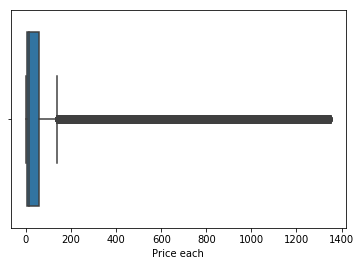

In [71]:
#Keep 3 Std deviation from the mean price in the dataset
seaborn.boxplot(x=salesTsPosVal_df['Price each'][(salesTsPosVal_df['Price each'] <= 1350) & (salesTsPosVal_df['Price each'] > 0) ])

In [72]:
#Shape before
print("Shape before Removing the price Outliers:" , salesTsPosVal_df.shape)
#Remove outliers in the price. Keep only 3 std dev from the mean price
salesTsPosVal_df = salesTsPosVal_df[(salesTsPosVal_df['Price each'] <= 1350)]
print("Shape after Removing the price Outliers:" , salesTsPosVal_df.shape)

# Describe the data witout the Price Outliers
salesTsPosVal_df.describe(include=list_include).T

Shape before Removing the price Outliers: (488948, 27)
Shape after Removing the price Outliers: (486494, 27)


,count,mean,std,min,25%,50%,75%,max
FGHO Mat Cost,486494.0,433.789627,1739.904927,-303.250000,0.000000,0.000000,380.570000,594000.000000
Freight,486494.0,1.060854,18.608650,0.000000,0.000000,0.000000,0.000000,2720.270000
Qty,486494.0,340.593121,5816.708364,0.001200,5.000000,20.000000,80.000000,944460.000000
Price each,486494.0,71.656087,144.535019,0.001000,3.490000,14.990000,56.860000,1350.000000
MaterialCost,486494.0,29.488005,61.884864,0.002000,1.580000,6.654000,25.510000,2981.000000
Labor,486494.0,1.357102,7.155644,0.000000,0.000000,0.000000,0.000000,1016.500000
itemMargin,486494.0,342.417860,1181.653253,-64530.000000,59.000000,151.168000,361.740000,650160.000000
percentMargin,486494.0,50.736517,468.352649,-278466.666667,41.104079,53.319027,64.669164,99.977910
priceEachNorm,486494.0,0.000553,0.001115,0.000000,0.000027,0.000116,0.000439,0.010418


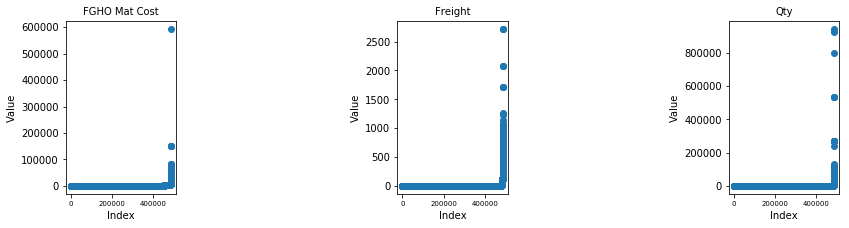

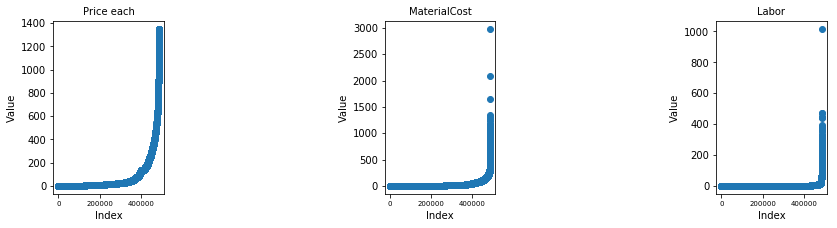

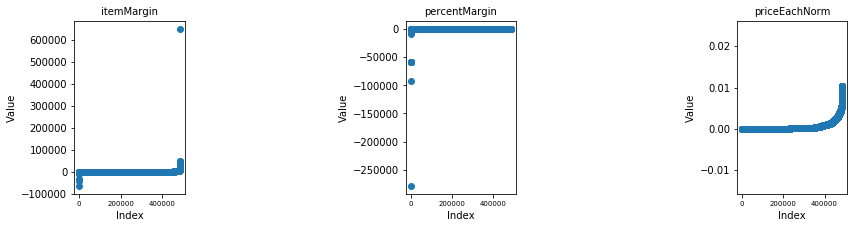

In [73]:
# Verify all float values.
# These charts do not include the price outliers
list_include = ['float64','int64']
i=1
for col in salesTsPosVal_df.select_dtypes(include=list_include).columns:
    if i<=3:
        #plt.figure(figsize=(10,4))
        plt.subplot(1,3,i)
        plt.scatter(range(salesTsPosVal_df.shape[0]),np.sort(salesTsPosVal_df[col].values))
        plt.xlabel('Index', size=10)
        plt.title(col, size=10)
        plt.ylabel('Value', size=10)
        plt.xticks(size=7)
        i = i + 1
    else:
                
        plt.subplots_adjust(top=1, bottom=0.4, left=0.01, right=1.8, hspace=0.25, wspace=2)
        plt.show()
        
        i=1
        plt.subplot(1,3,i)
        plt.scatter(range(salesTsPosVal_df.shape[0]),np.sort(salesTsPosVal_df[col].values))
        plt.xlabel('Index', size=10)
        plt.title(col, size=10)
        plt.ylabel('Value', size=10)
        plt.xticks(size=7)
        i = i + 1
        
        
        

plt.subplots_adjust(top=1, bottom=0.4, left=0.01, right=1.8, hspace=0.25, wspace=2)
plt.show() 

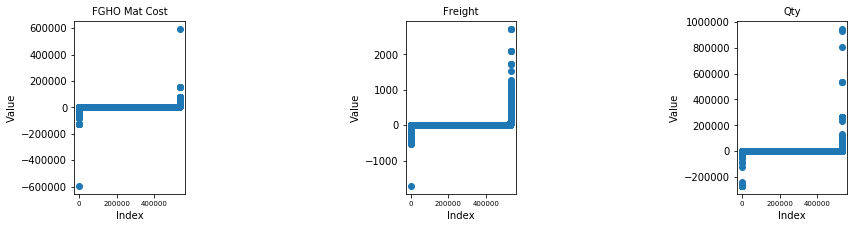

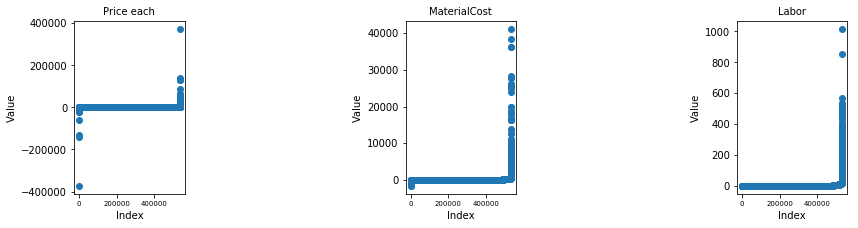

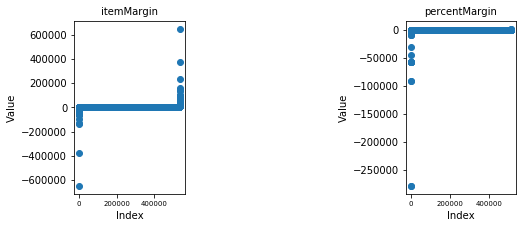

In [15]:
# Verify all float values
list_include = ['float64','int64']
i=1
for col in salesTs_df.select_dtypes(include=list_include).columns:
    if i<=3:
        #plt.figure(figsize=(10,4))
        plt.subplot(1,3,i)
        plt.scatter(range(salesTs_df.shape[0]),np.sort(salesTs_df[col].values))
        plt.xlabel('Index', size=10)
        plt.title(col, size=10)
        plt.ylabel('Value', size=10)
        plt.xticks(size=7)
        i = i + 1
    else:
                
        plt.subplots_adjust(top=1, bottom=0.4, left=0.01, right=1.8, hspace=0.25, wspace=2)
        plt.show()
        
        i=1
        plt.subplot(1,3,i)
        plt.scatter(range(salesTs_df.shape[0]),np.sort(salesTs_df[col].values))
        plt.xlabel('Index', size=10)
        plt.title(col, size=10)
        plt.ylabel('Value', size=10)
        plt.xticks(size=7)
        i = i + 1
        
        
        

plt.subplots_adjust(top=1, bottom=0.4, left=0.01, right=1.8, hspace=0.25, wspace=2)
plt.show() 

#### Correlation Matrix

It can be observed that there is a positve correation between _Price each_ and _MaterialCost_. All other variables seem to be independent of each other.  
There there are some outliers in the data that may skew some of the results if used as part of the analysis. 

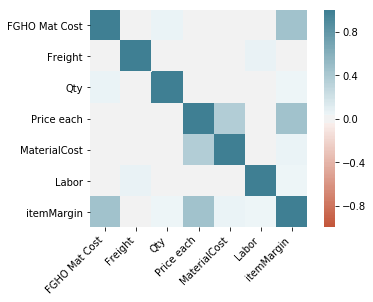

In [16]:
# Step 0 - Read the dataset, calculate column correlations and make a seaborn heatmap

data = salesTs_df.copy()

corr = data.corr()
ax = seaborn.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=seaborn.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

#### Scatter Matrix
This scatter matrix shows in many cases that the variables are independent of each other. This is in line with the previous heat map. However, there is a need to understand if some of these variables can be the basis for a new feature. For example costs, can be the addition of _Freight, MaterialCosts, and Labor_ if this were to be of interest.

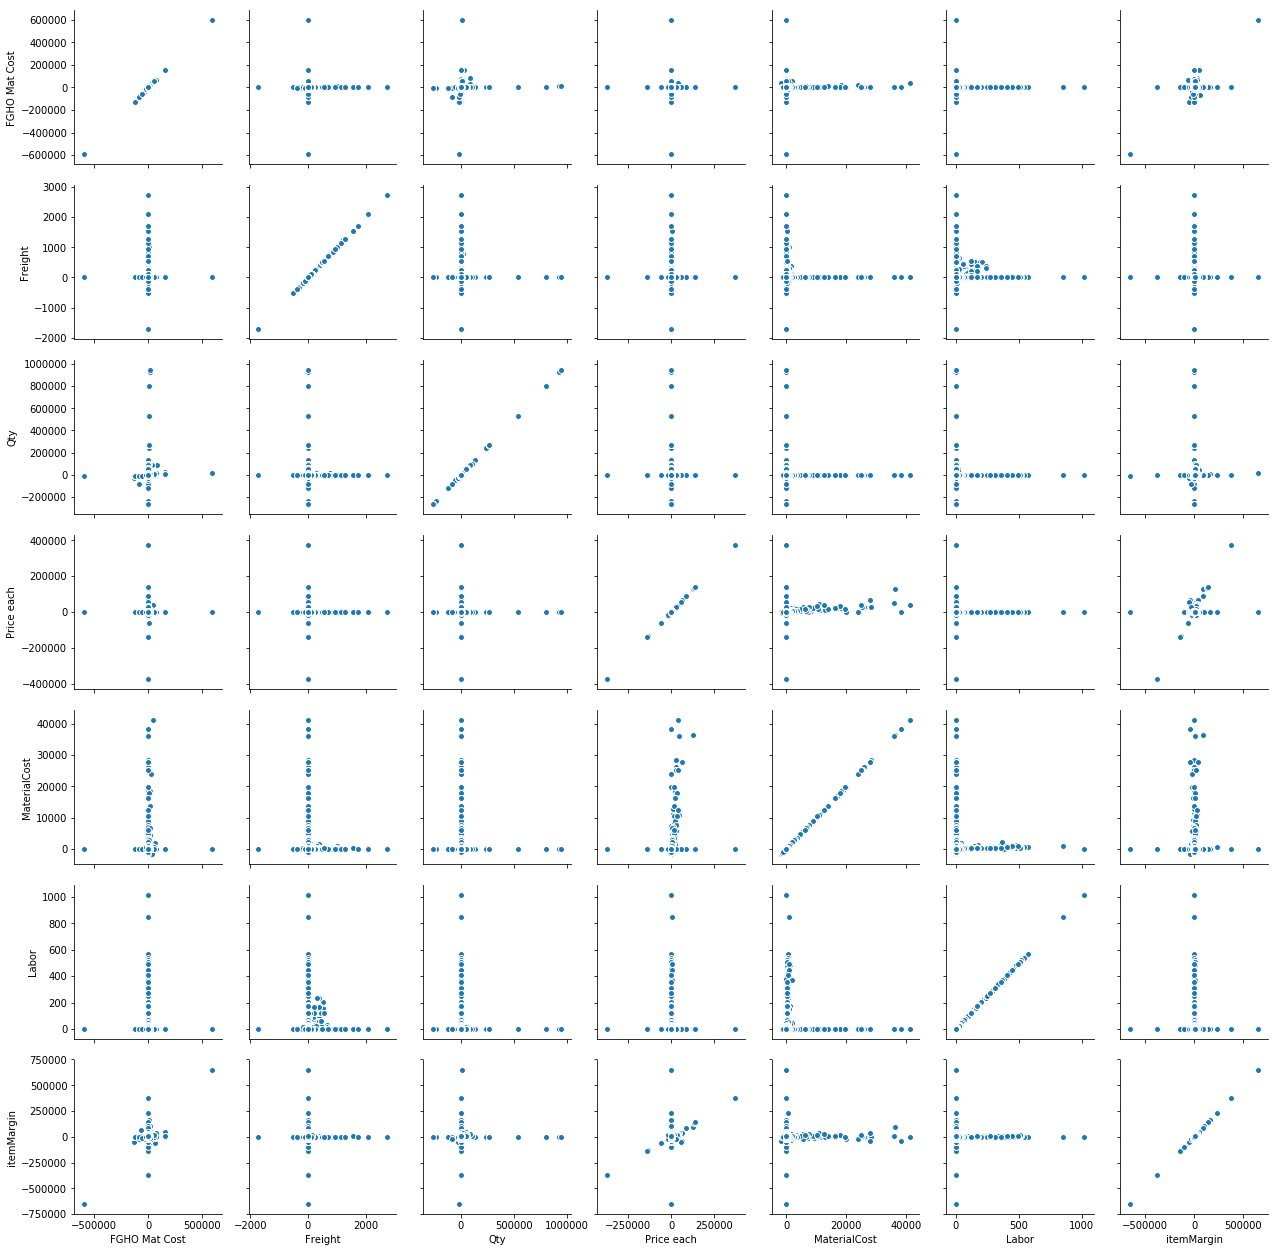

In [17]:
# Basic correlogram
data=data.dropna(how='all')
seaborn.pairplot(data[['FGHO Mat Cost','Freight','Qty','Price each', 'MaterialCost','Labor', 'itemMargin']], diag_kind=None)
#plt.show()


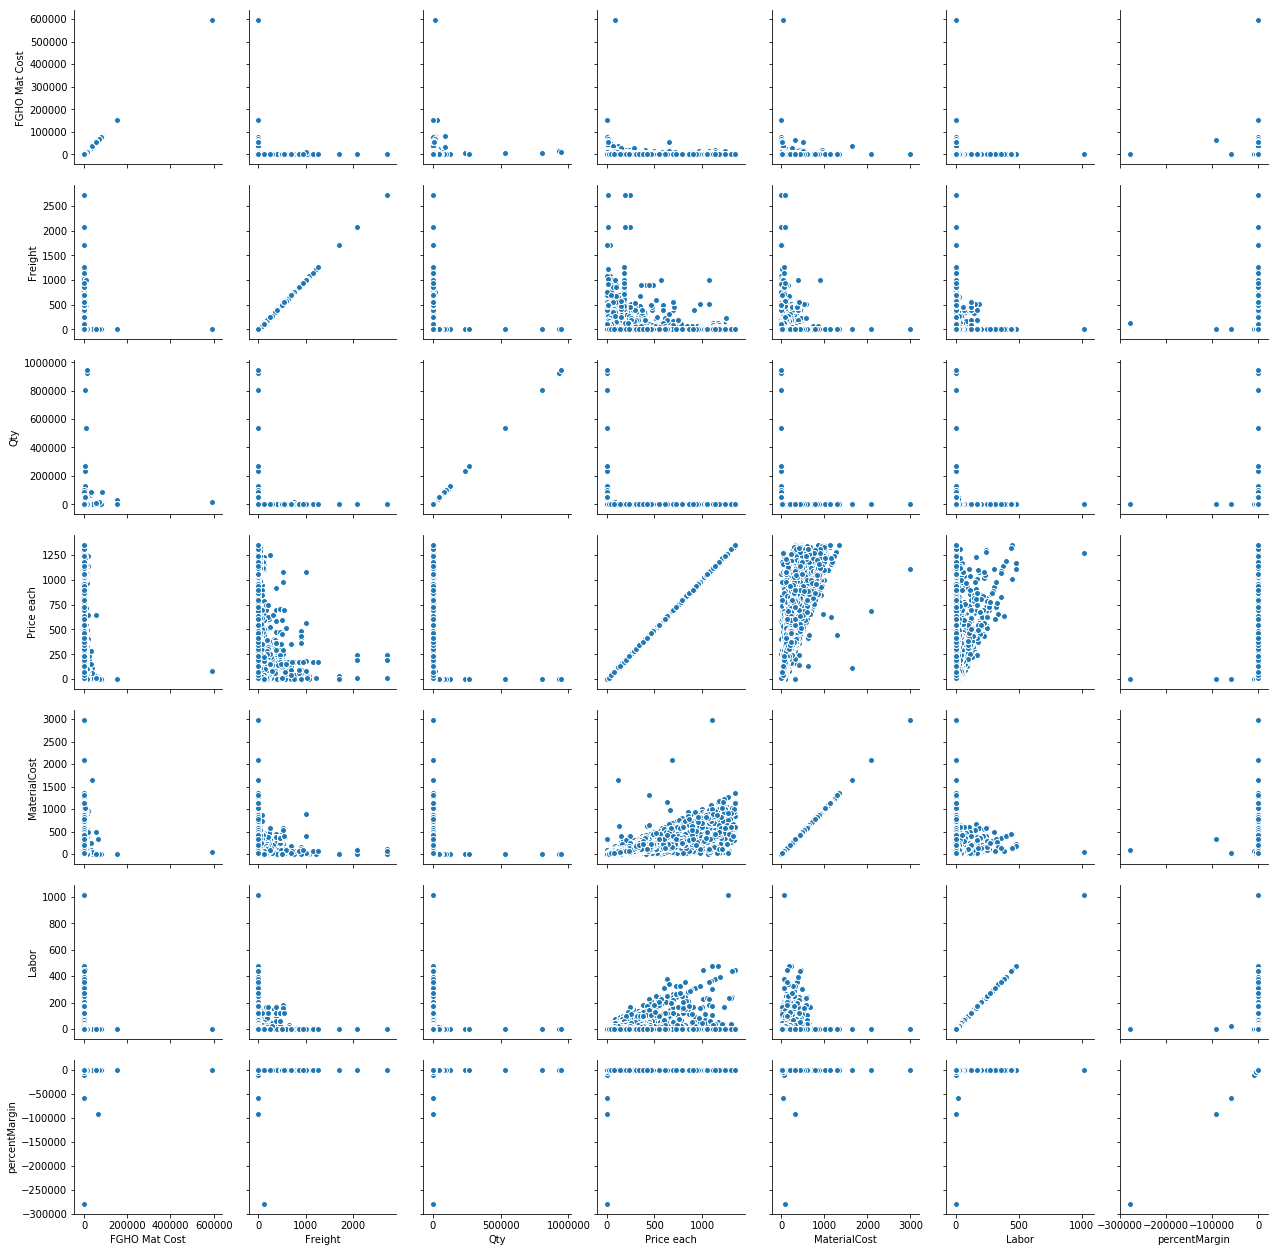

In [76]:
# Basic correlogram Using the data without outliers and negative values in the pricing
data= salesTsPosVal_df.copy()
data=data.dropna(how='all')
seaborn.pairplot(data[['FGHO Mat Cost','Freight','Qty','Price each', 'MaterialCost','Labor', 'percentMargin']], diag_kind=None)
#plt.show()


#### Histograms
The histograms show large outliers in each of the variables. The majority of the values are concentrated in the hundred range.

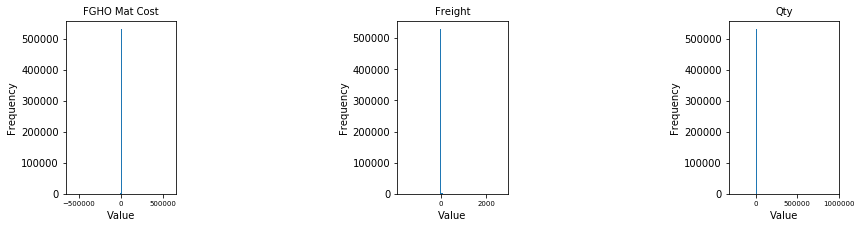

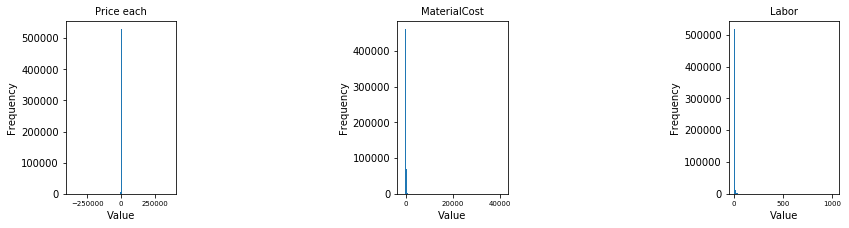

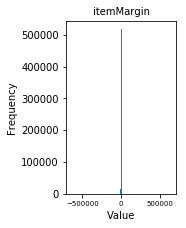

In [18]:
# Verify all float values
list_include = ['float64','int64']
i=1
for col in salesTs_df.select_dtypes(include=list_include).columns:
    if i<=3:
        #plt.figure(figsize=(10,4))
        plt.subplot(1,3,i)
        plt.hist(x=salesTs_df[col].dropna().values, bins=100)
        plt.xlabel('Value', size=10)
        plt.title(col, size=10)
        plt.ylabel('Frequency', size=10)
        plt.xticks(size=7)
        i = i + 1
    else:
                
        plt.subplots_adjust(top=1, bottom=0.4, left=0.01, right=1.8, hspace=0.25, wspace=2)
        plt.show()
        
        i=1
        plt.subplot(1,3,i)
        plt.hist(x=salesTs_df[col].dropna().values, bins=100)
        plt.xlabel('Value', size=10)
        plt.title(col, size=10)
        plt.ylabel('Frequency', size=10)
        plt.xticks(size=7)
        i = i + 1
        
        
        

plt.subplots_adjust(top=1, bottom=0.4, left=0.01, right=1.8, hspace=0.25, wspace=2)
plt.show() 

The histograms below use the data without the price outliers

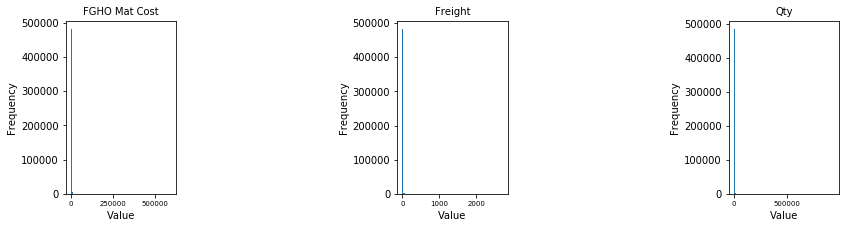

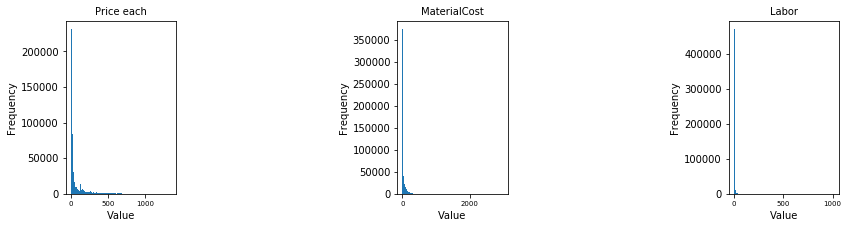

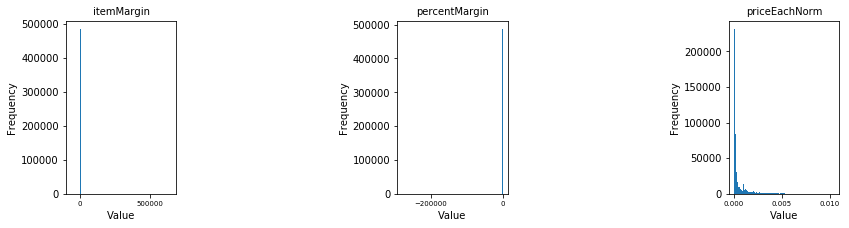

In [66]:
# Verify all float values
list_include = ['float64','int64']
i=1
for col in salesTsPosVal_df.select_dtypes(include=list_include).columns:
    if i<=3:
        #plt.figure(figsize=(10,4))
        plt.subplot(1,3,i)
        plt.hist(x=salesTsPosVal_df[col].dropna().values, bins=100)
        plt.xlabel('Value', size=10)
        plt.title(col, size=10)
        plt.ylabel('Frequency', size=10)
        plt.xticks(size=7)
        i = i + 1
    else:
                
        plt.subplots_adjust(top=1, bottom=0.4, left=0.01, right=1.8, hspace=0.25, wspace=2)
        plt.show()
        
        i=1
        plt.subplot(1,3,i)
        plt.hist(x=salesTsPosVal_df[col].dropna().values, bins=100)
        plt.xlabel('Value', size=10)
        plt.title(col, size=10)
        plt.ylabel('Frequency', size=10)
        plt.xticks(size=7)
        i = i + 1
        
        
        

plt.subplots_adjust(top=1, bottom=0.4, left=0.01, right=1.8, hspace=0.25, wspace=2)
plt.show()

### Missing Values

There are no considerable number of missing values in the _Ship Date_, _Price each_,or _Qty_ columns that would need estimation.

In [19]:
# Missing Values
dtype_df=salesTs_df.dtypes.reset_index()
dtype_df.columns=["Count","ColumnType"]
dtype_df.groupby("ColumnType").aggregate('count').reset_index()
missing_df=salesTs_df.isnull().sum(axis=0).reset_index()
missing_df.columns=['ColumnName','MissingCount']
missing_df=missing_df.ix[missing_df['MissingCount']>0]
missing_df=missing_df.sort_values(by='MissingCount')

missing_df = missing_df.merge(dtype_df,left_on = 'ColumnName', right_on = 'Count', how= 'left')
missing_df

D:\Masters\Anaconda\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  import sys


,ColumnName,MissingCount,Count,ColumnType
0,Freight,1,Freight,float64
1,Location,1,Location,object
2,Ship Date,1,Ship Date,object
3,itemMargin,2,itemMargin,float64
4,Labor,2,Labor,float64
5,HT Lumber,2,HT Lumber,object
6,MaterialCost,2,MaterialCost,float64
7,Price each,2,Price each,float64
8,FGHO,2,FGHO,object
9,SRV,2,SRV,object


### Trend Summary  
This section will explore the trend in sales, material quantities, and orders count. There are some observation that need to be remove along the analysis due wrong dates and negative sales. 
_The removed records would need to be validated_

In [20]:
# Order Sum by day

## Time Series for Price each and Qty

priceTs_df = salesTs_df[['Ship Date',
                        'Price each',
                        'itemMargin',
                        'Qty']]

priceTs_df['Ship Date'] =  pd.to_datetime(priceTs_df['Ship Date'])

order_sum_df=priceTs_df.groupby(['Ship Date']).agg(['sum','count']).reset_index().sort_values(by=(['Ship Date']))
sales_sum_df=order_sum_df.set_index('Ship Date')

sales_sum_df['Year'] = sales_sum_df.index.year
sales_sum_df['Month'] = sales_sum_df.index.month
sales_sum_df['WeekdayName'] = sales_sum_df.index.weekday_name
sales_sum_df.head()

D:\Masters\Anaconda\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


Price each       itemMargin             Qty        Year Month  \
                  sum count        sum count       sum count               
Ship Date                                                                  
2000-03-01       2.10     1    295.200     1     240.0     1  2000     3   
2001-04-29      22.46     1     23.720     1      10.0     1  2001     4   
2008-11-26       0.25     1     40.500     1     162.0     1  2008    11   
2009-01-04      55.00     1   2200.000     1      40.0     1  2009     1   
2009-01-05    4392.80   133  43028.573   133  151333.0   133  2009     1   

           WeekdayName  
                        
Ship Date               
2000-03-01   Wednesday  
2001-04-29      Sunday  
2008-11-26   Wednesday  
2009-01-04      Sunday  
2009-01-05      Monday

In [85]:
# Price Negative and outliers removed
# Order Sum by day

## Time Series for Price each and Qty

priceTsPosVal_df = salesTsPosVal_df[['Ship Date',
                        'Price each',
                        'itemMargin',
                        'MaterialCost',
                        'Qty',
                        'percentMargin']]

priceTsPosVal_df['Ship Date'] =  pd.to_datetime(priceTsPosVal_df['Ship Date'])

order_sum_PosVal_df=priceTsPosVal_df.groupby(['Ship Date']).agg(['sum','count']).reset_index().sort_values(by=(['Ship Date']))
sales_sum_PosVal_df=order_sum_PosVal_df.set_index('Ship Date')

sales_sum_PosVal_df['Year'] = sales_sum_PosVal_df.index.year
sales_sum_PosVal_df['Month'] = sales_sum_PosVal_df.index.month
sales_sum_PosVal_df['WeekdayName'] = sales_sum_PosVal_df.index.weekday_name
sales_sum_PosVal_df.head()

D:\Masters\Anaconda\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


Price each       itemMargin       MaterialCost             Qty  \
                  sum count        sum count          sum count       sum   
Ship Date                                                                   
2000-03-01     2.1000     1    295.200     1      0.87000     1     240.0   
2001-04-29    22.4600     1     23.720     1     20.08800     1      10.0   
2009-01-05  4392.8000   133  43028.573   133   2281.67900   133  151333.0   
2009-01-06  2511.9786   119  28899.025   119    823.95294   119   93020.0   
2009-01-07  3565.0110   128  44330.570   128   1817.94920   128   54568.0   

                 percentMargin        Year Month WeekdayName  
           count           sum count                          
Ship Date                                                     
2000-03-01     1     58.571429     1  2000     3   Wednesday  
2001-04-29     1     10.560997     1  2001     4      Sunday  
2009-01-05   133   7594.170914   133  2009     1      Monday  
2009-01-06   119   6848.967409   119  2009     1     Tuesday  
2009-01-07   128   6766.895226   128  2009     1   Wednesday

In [21]:
## Remove dates outside the range provided in the data
sales_sum_df = sales_sum_df[(sales_sum_df.index >= '2009-1-1') & (sales_sum_df.index <= '2018-12-31')]

In [86]:
## Remove dates outside the range provided in the data for positive values
sales_sum_PosVal_df = sales_sum_PosVal_df[(sales_sum_PosVal_df.index >= '2009-1-1') & (sales_sum_PosVal_df.index <= '2018-12-31')]

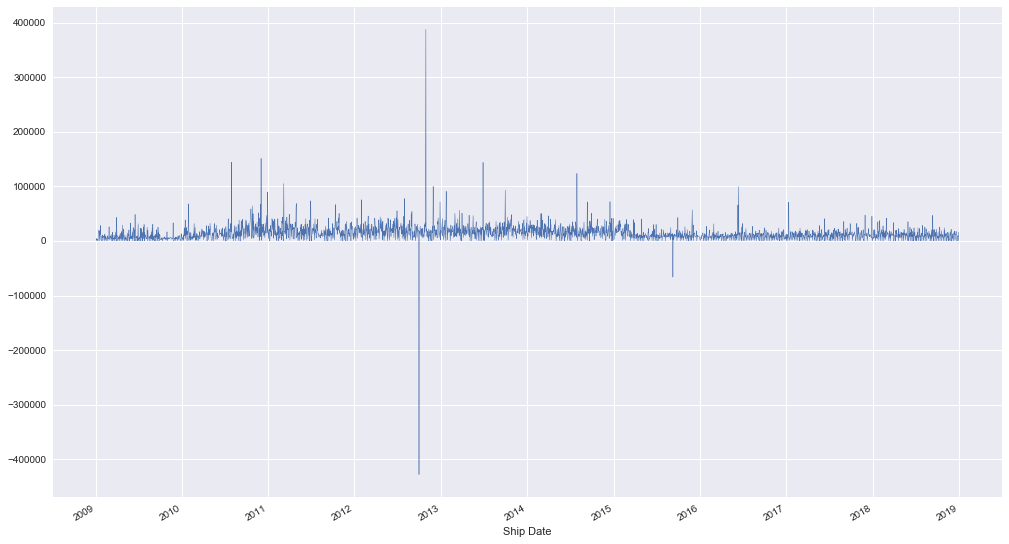

In [22]:
seaborn.set(rc={'figure.figsize':(17, 10)})
sales_sum_df['Price each','sum'].plot(linewidth=0.5);

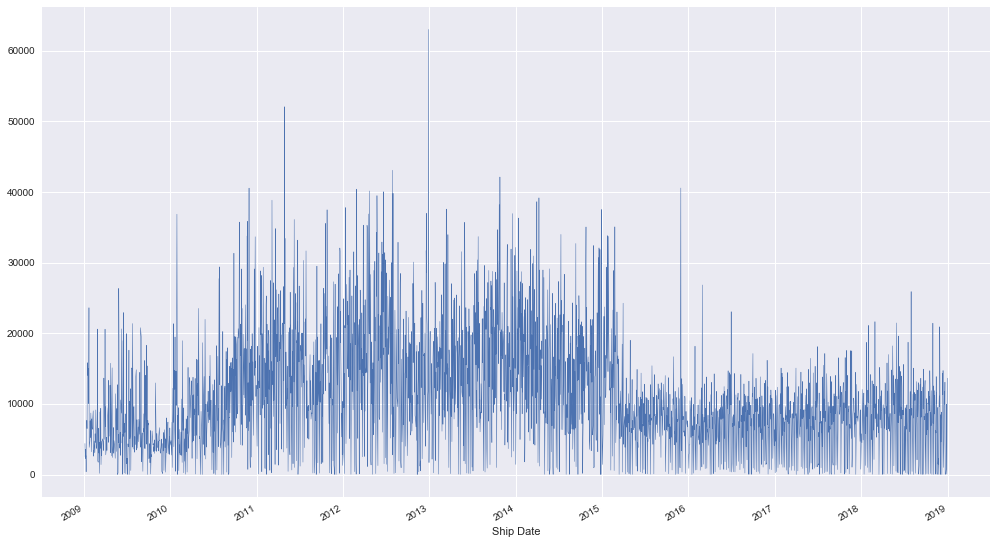

In [87]:
seaborn.set(rc={'figure.figsize':(17, 10)})
sales_sum_PosVal_df['Price each','sum'].plot(linewidth=0.5);

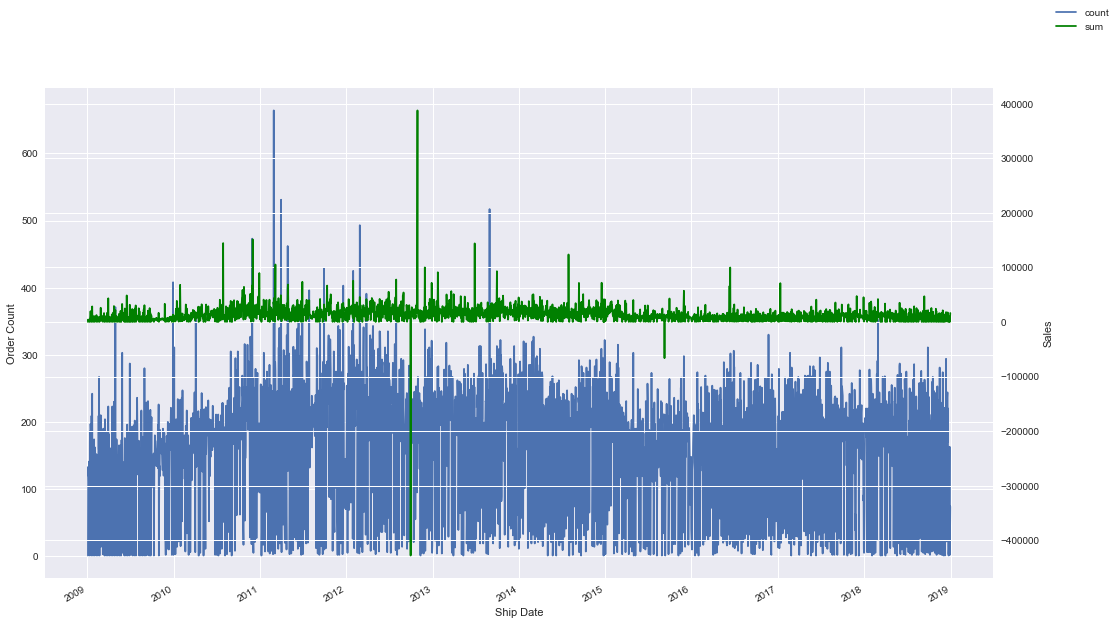

In [23]:
ax = sales_sum_df['Price each'].plot(y='count', legend=False)
ax2 = ax.twinx()
sales_sum_df['Price each'].plot(y="sum", ax=ax2, legend=False, color="g")
ax.figure.legend()
ax.set_ylabel('Order Count');
ax2.set_ylabel('Sales');

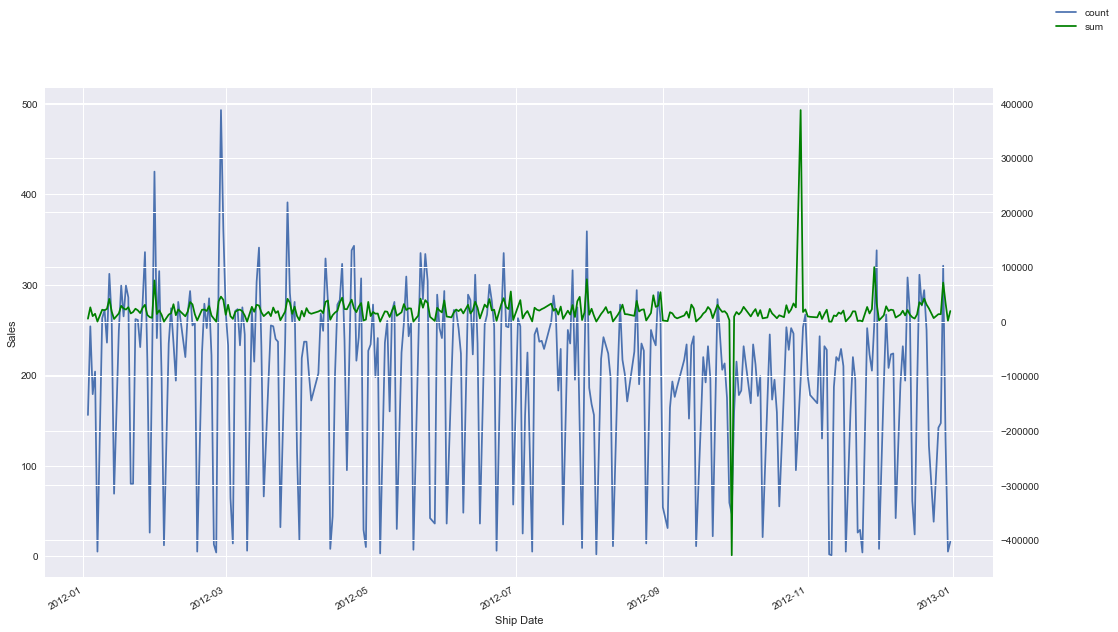

In [24]:
ax = sales_sum_df.loc['2012','Price each'].plot(y='count', legend=False)
ax2 = ax.twinx()
sales_sum_df.loc['2012','Price each'].plot(y='sum', ax=ax2, legend=False, color="g")
ax.figure.legend()
ax.set_ylabel('Sales');

In [25]:
sales_sum_df[sales_sum_df['Price each','sum'] > 300000]

Price each        itemMargin            Qty        Year Month  \
                  sum count         sum count      sum count               
Ship Date                                                                  
2012-10-29  387463.65   195  457302.349   195  24568.0   195  2012    10   

           WeekdayName  
                        
Ship Date               
2012-10-29      Monday

In [26]:
sales_sum_df[sales_sum_df['Price each','sum'] < 0]

Price each        itemMargin              Qty        Year Month  \
                    sum count         sum count        sum count               
Ship Date                                                                      
2012-09-30 -427899.3800    47 -50855.2500    47    6881.59    47  2012     9   
2015-09-09  -66254.1625   211  86042.6065   211  126666.00   211  2015     9   

           WeekdayName  
                        
Ship Date               
2012-09-30      Sunday  
2015-09-09   Wednesday

In [27]:
## Remove the dates with issues. Given the case that these records are valid, then this piece of code should be removed
sales_sum_df=sales_sum_df[sales_sum_df['Price each','sum'] < 300000]

sales_sum_df=sales_sum_df[sales_sum_df['Price each','sum'] > 0]

#### Plot - Total of Sales and Number of orders

This plot is difficult to follow since are daily values. It can still be seen that the trends follow each other. Monthly aggregate plots can give a better sense of how these two variables follow each other.

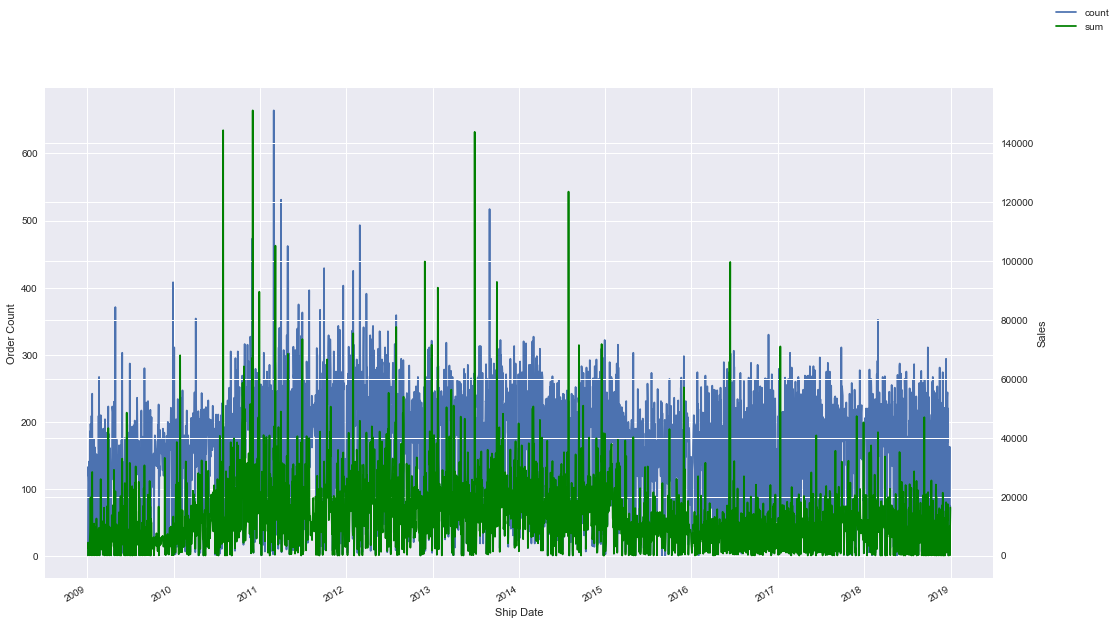

In [28]:
ax = sales_sum_df['Price each'].plot(y='count', legend=False)
ax2 = ax.twinx()
sales_sum_df['Price each'].plot(y="sum", ax=ax2, legend=False, color="g")
ax.figure.legend()
ax.set_ylabel('Order Count');
ax2.set_ylabel('Sales');

**Total Quantity plot vs Total Orders**  
_The plot shows negative quantities. Does this means that these are returns?_ 

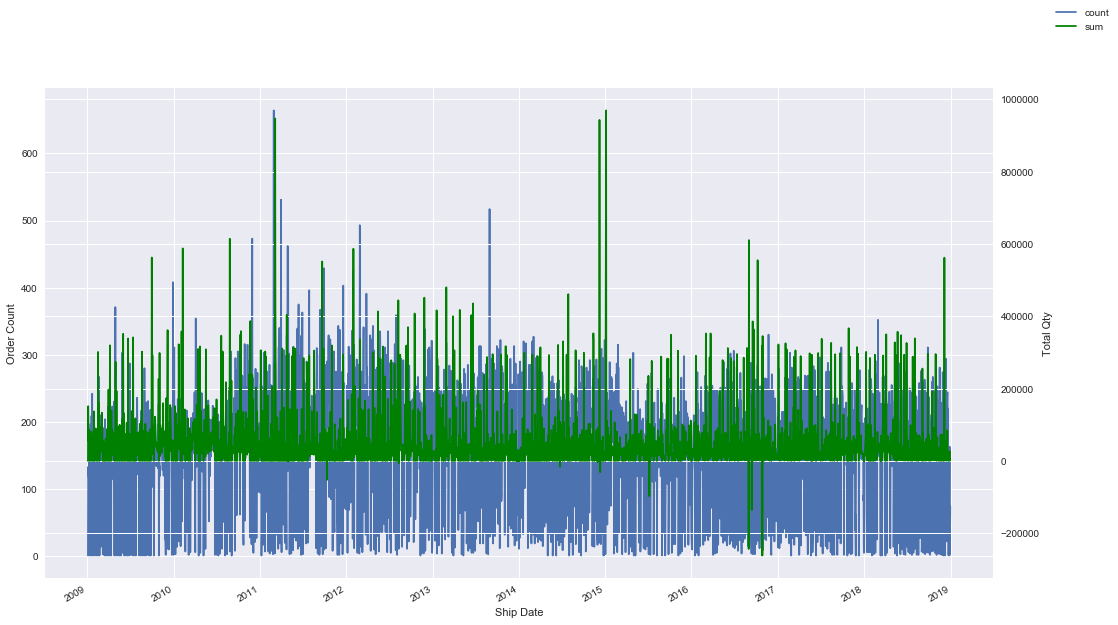

In [29]:
ax = sales_sum_df['Qty'].plot(y='count', legend=False)
ax2 = ax.twinx()
sales_sum_df['Qty'].plot(y="sum", ax=ax2, legend=False, color="g")
ax.figure.legend()
ax.set_ylabel('Order Count');
ax2.set_ylabel('Total Qty');

**Total Margin vs Total Orders** 

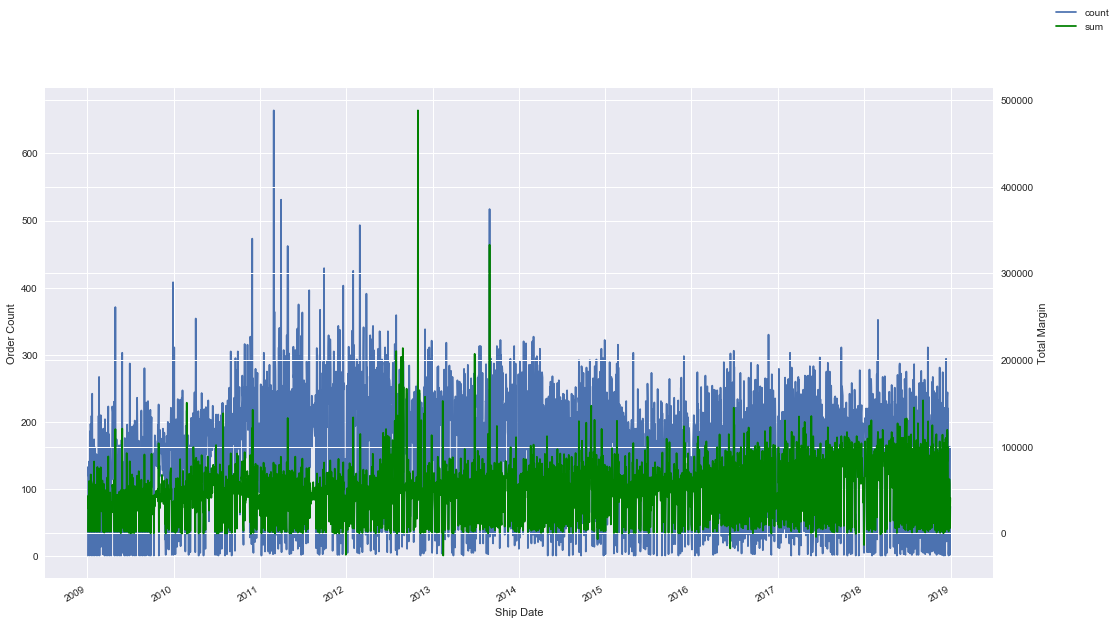

In [30]:
ax = sales_sum_df['itemMargin'].plot(y='count', legend=False)
ax2 = ax.twinx()
sales_sum_df['itemMargin'].plot(y="sum", ax=ax2, legend=False, color="g")
ax.figure.legend()
ax.set_ylabel('Order Count');
ax2.set_ylabel('Total Margin');

#### Correlation between Price and Quantity

The Price and Quantity variables are positive correlated. The more Quantity is sold the more the total price or revenue. Also,  the correlation between order count and revenue is present as expected. 

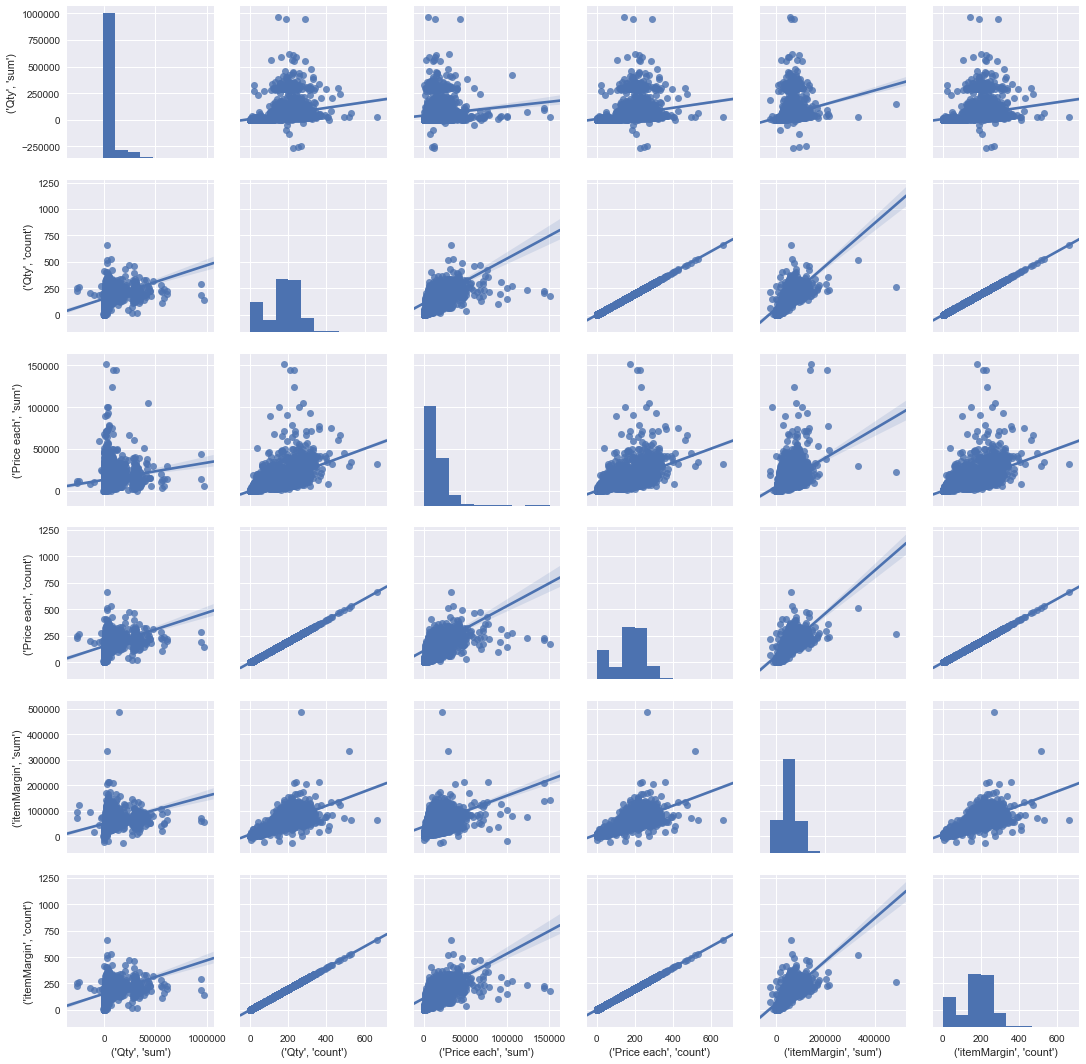

In [31]:
# Basic correlogram
data=sales_sum_df.dropna(how='all')
seaborn.pairplot(data[['Qty','Price each','itemMargin']], diag_kind='hist', kind='reg')
#plt.show()

D:\Masters\Anaconda\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


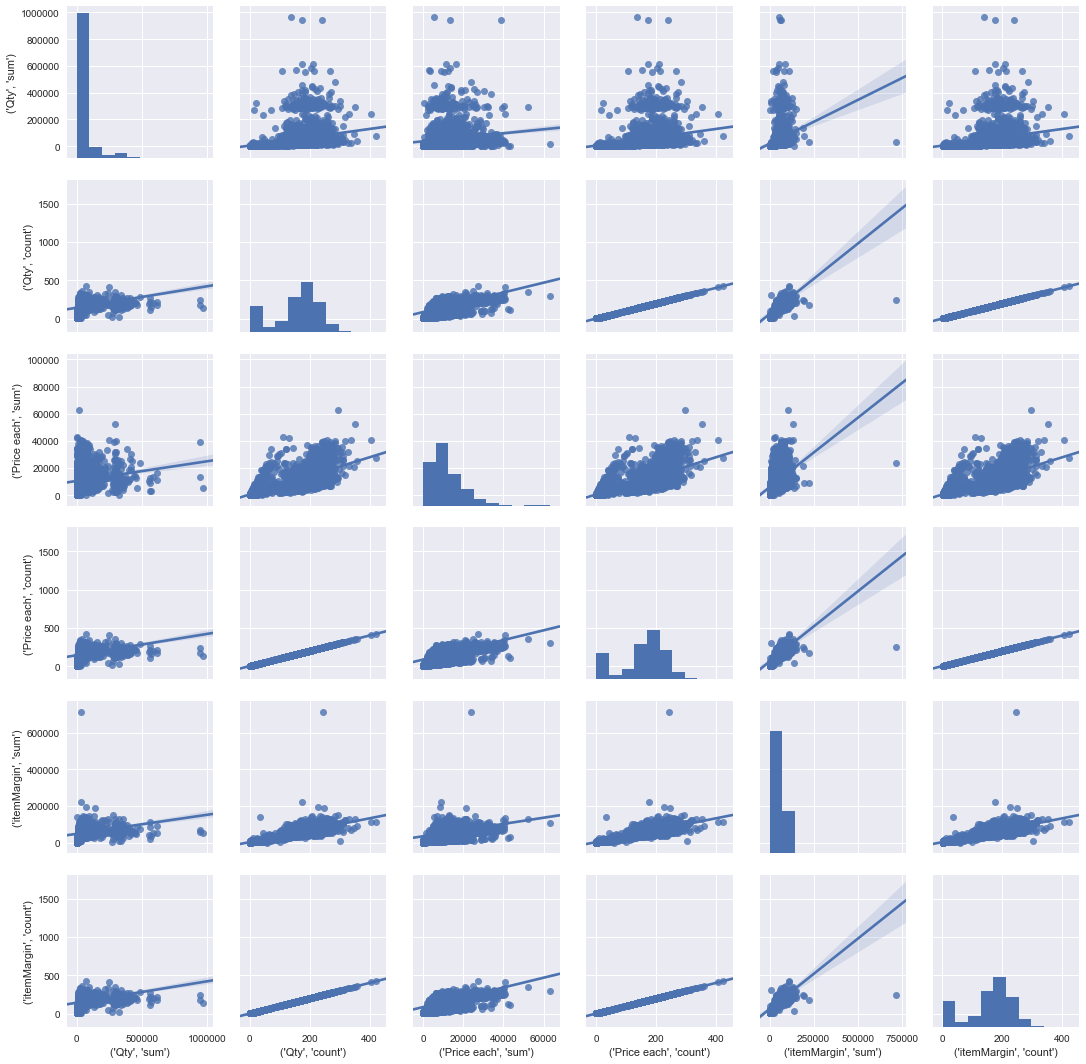

In [82]:
# Basic correlogram
data=sales_sum_PosVal_df.dropna(how='all')
seaborn.pairplot(data[['Qty','Price each','itemMargin']], diag_kind='hist', kind='reg')
#plt.show()

### Monthly Aggregate

#### Quantity and Sales over time  

The quantities trend starts a downtrend before reaching around 2011. However, the sales remain stable during this downward trend in quantities, which may suggest lower quantities of more expensive packaging sales.  

In [32]:
y = sales_sum_df['Price each'].resample('MS').sum()
y2=sales_sum_df['Qty'].resample('MS').sum()
y3=sales_sum_df['itemMargin'].resample('MS').sum()

In [101]:
#Data with positive values for price
yP = sales_sum_PosVal_df['Price each'].resample('MS').sum()
y2P=sales_sum_PosVal_df['Qty'].resample('MS').sum()
y3P=sales_sum_PosVal_df['itemMargin'].resample('MS').sum()
y4P=sales_sum_PosVal_df[['Price each','Qty','MaterialCost']].resample('MS').sum()
monthlyPercentMargin = 100*(y4P['Price each','sum'] - y4P['MaterialCost','sum']) / y4P['Price each','sum'] 

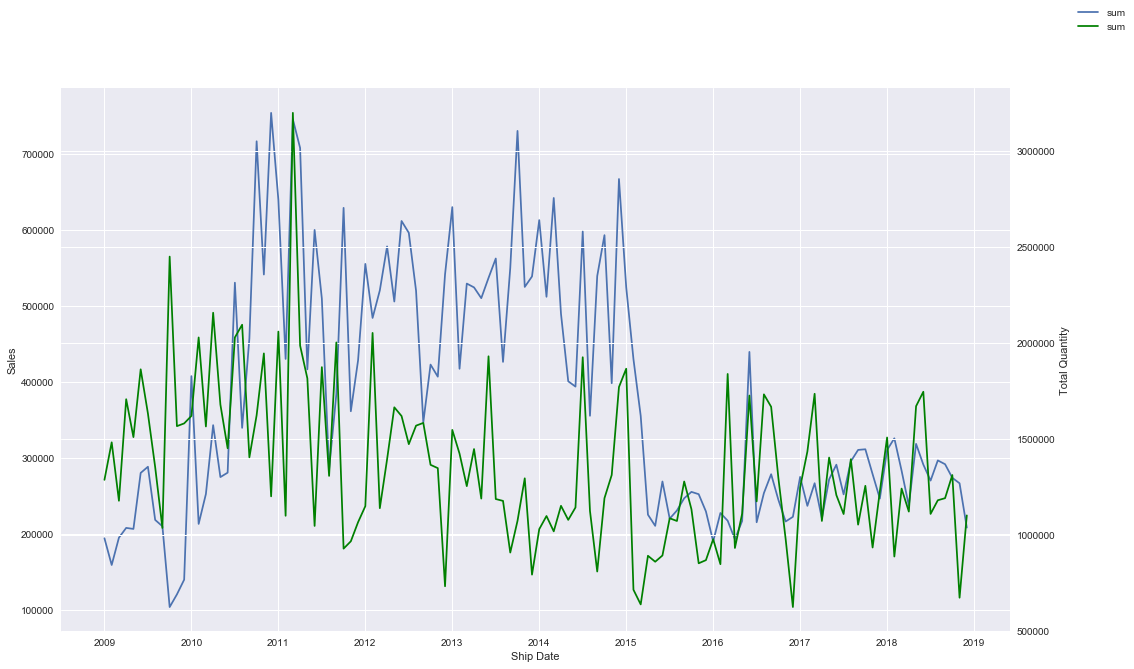

In [33]:
ax = y.plot(y='sum', legend=False)
ax2 = ax.twinx()
y2.plot(y="sum", ax=ax2, legend=False, color="g")
ax.figure.legend()
ax.set_ylabel('Sales');
ax2.set_ylabel('Total Quantity');

#### Margin Over Time

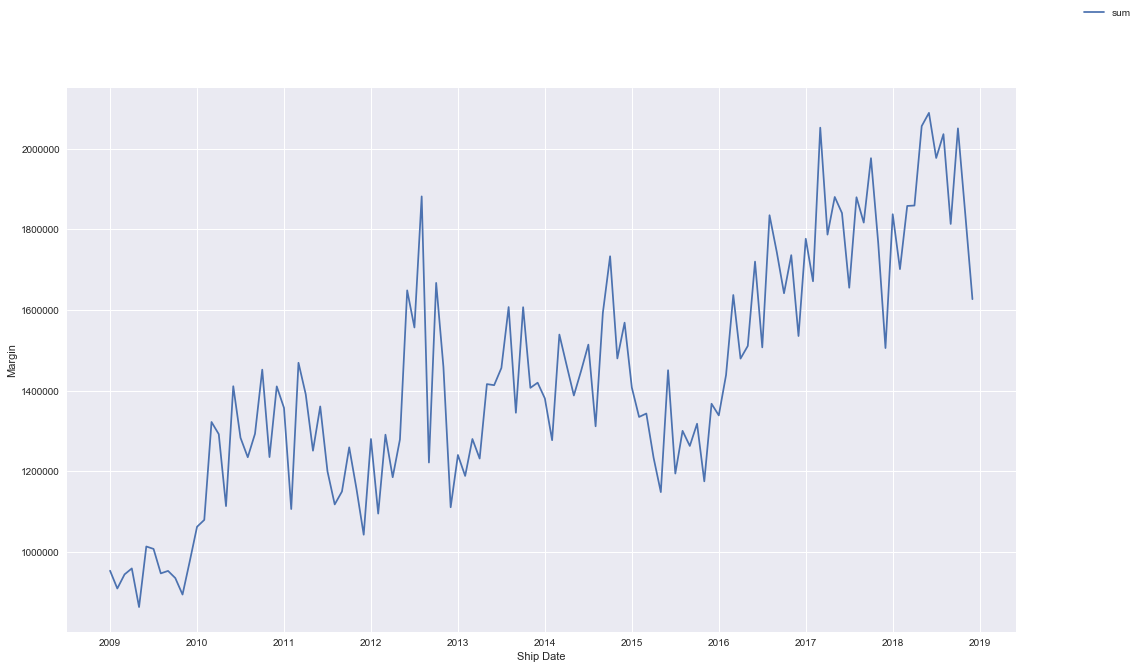

In [34]:
ax = y3.plot(y='sum', legend=False)
ax.figure.legend()
ax.set_ylabel('Margin');

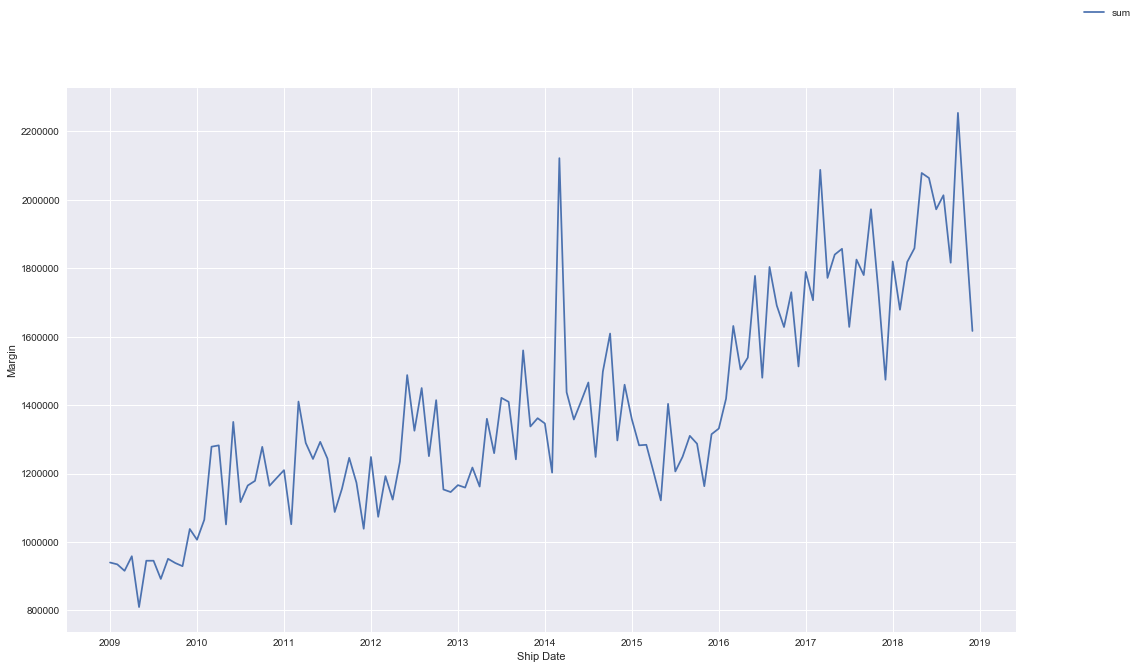

In [84]:
# Positive Values on Pricing and ouliers removal
ax = y3P.plot(y='sum', legend=False)
ax.figure.legend()
ax.set_ylabel('Margin');

In [100]:
monthlyPercentMargin.head(20)

Ship Date
2009-01-01    61.1612
2009-02-01    60.1219
2009-03-01    59.9032
2009-04-01    63.5556
2009-05-01    57.6665
2009-06-01    63.0072
2009-07-01    63.7731
2009-08-01    60.2886
2009-09-01    60.1548
2009-10-01     54.293
2009-11-01    54.8496
2009-12-01    55.2496
2010-01-01    63.9324
2010-02-01    59.6556
2010-03-01    60.9424
2010-04-01    62.5614
2010-05-01    59.3139
2010-06-01    58.3851
2010-07-01    63.8585
2010-08-01    59.3624
dtype: object

Ship Date
2009-01-01    61.161228
2009-02-01    60.121910
2009-03-01    59.903203
2009-04-01    63.555560
2009-05-01    57.666454
2009-06-01    63.007211
2009-07-01    63.773138
2009-08-01    60.288612
2009-09-01    60.154806
2009-10-01    54.293016
2009-11-01    54.849558
2009-12-01    55.249575
2010-01-01    63.932369
2010-02-01    59.655636
2010-03-01    60.942395
2010-04-01    62.561403
2010-05-01    59.313888
2010-06-01    58.385107
2010-07-01    63.858451
2010-08-01    59.362389
Freq: MS, dtype: float64

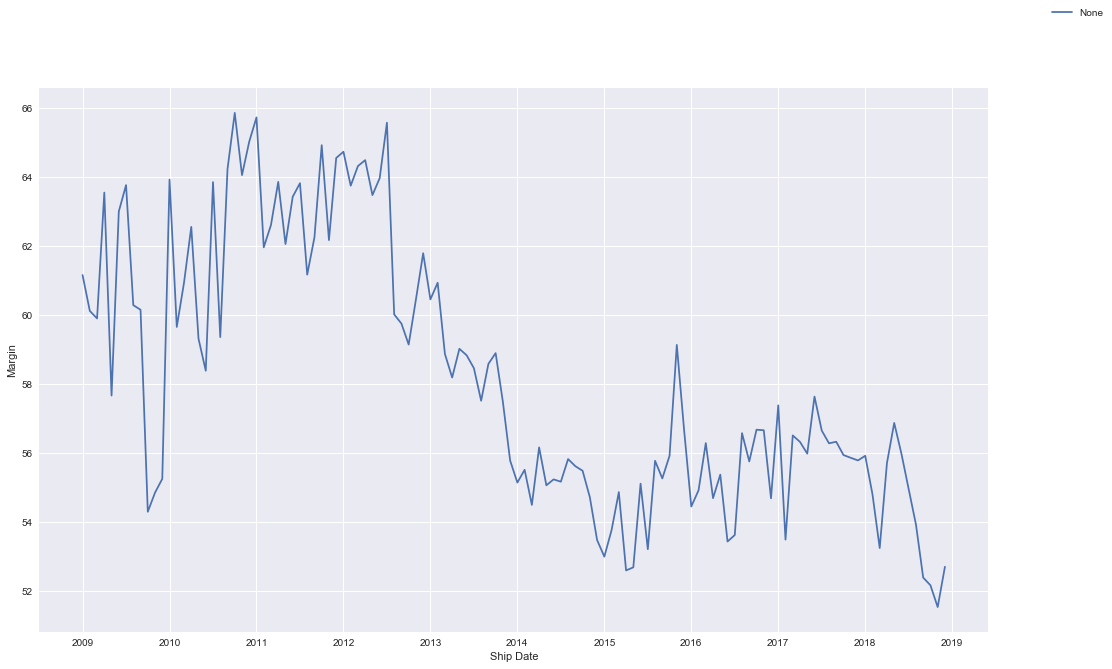

In [102]:
# Positive Values on Pricing and ouliers removal
ax = monthlyPercentMargin.plot(y='sum', legend=False)
ax.figure.legend()
ax.set_ylabel('Margin');
#y3P.head(20)
monthlyPercentMargin.head(20)

### Decomposition of the trend


#### This is for the split for the monthly total orders  
The number of orders reached its peak around mid-2011, since then there has been a downward trend in the number of orders of materials for packaging, reaching its lowest point on mid-2015, since then it has to a 50 % of what was in 2011.

In [105]:
import statsmodels.api as sm
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y['count'], model='additive')
fig = decomposition.plot()
plt.show()

D:\Masters\Anaconda\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


NameError: name 'y' is not defined

#### Split for the Sales Variable (Price each)
The sales revenue peaked at the end of 2011. During next three years and a half the trend remained flat until mid-2014 when the sales revenue started to tren down, it reached its lowest point at the end of 2015, and the recovery has been slow, but constant. However, the number of orders has maintained constant, which indicates an increase in prices or the orders includes sophisticated, more expensive packages.

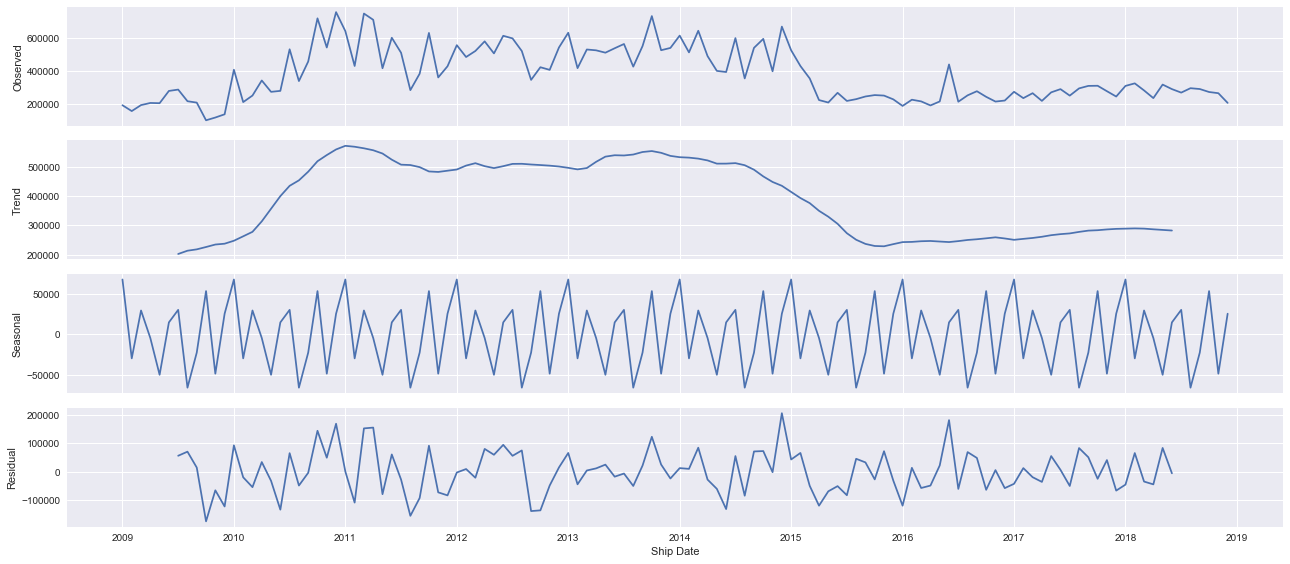

In [36]:

rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y['sum'], model='additive')
fig = decomposition.plot()
plt.show()

#### This is the split for the total monthly quantities
The monthly quantities showed a downward trend from 2011 until mid-2015 when the trend started to pick up until the end of 2016. Since 2016 the monthly quantities trend has been flat. Also, the residual or random component has maintained the variability under control since 2016.
On the seasonality shows a decrease in quantities at the end of each year and picking up the highest number of material in the first and second quarters.

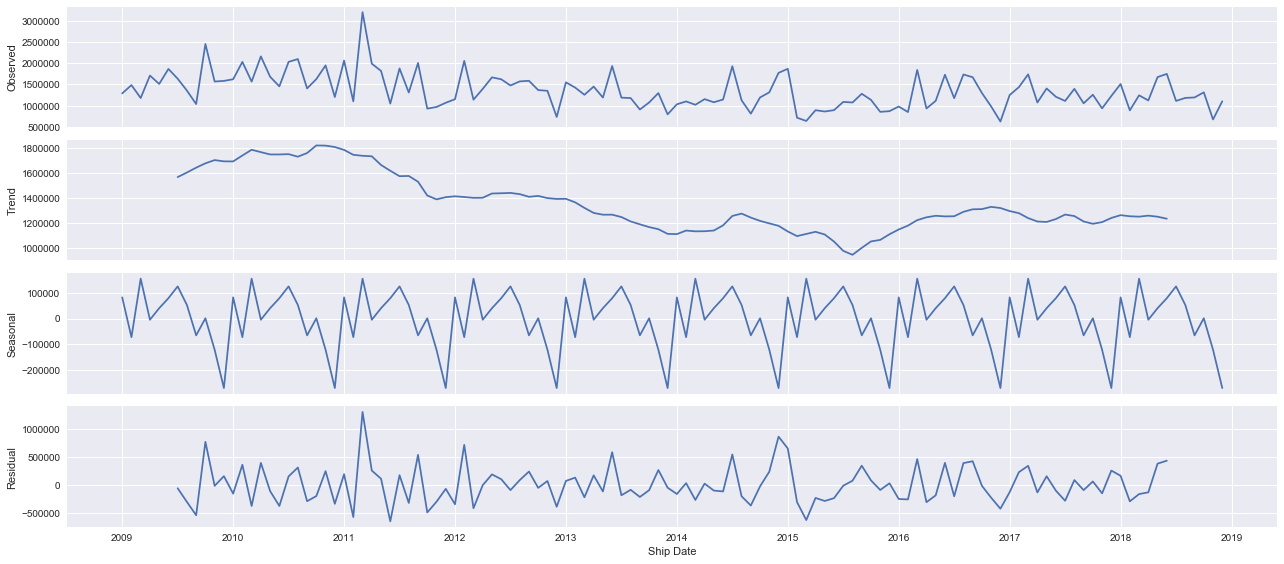

In [37]:
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y2['sum'], model='additive')
fig = decomposition.plot()
plt.show()

#### This is the split for the Margins over time

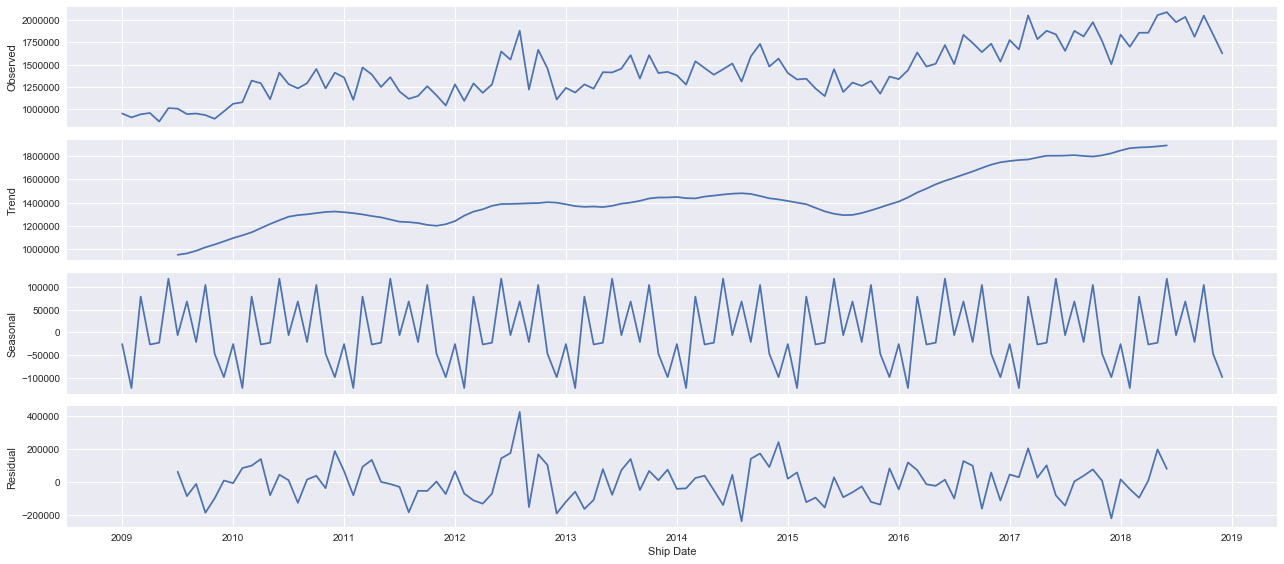

In [38]:
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y3['sum'], model='additive')
fig = decomposition.plot()
plt.show()

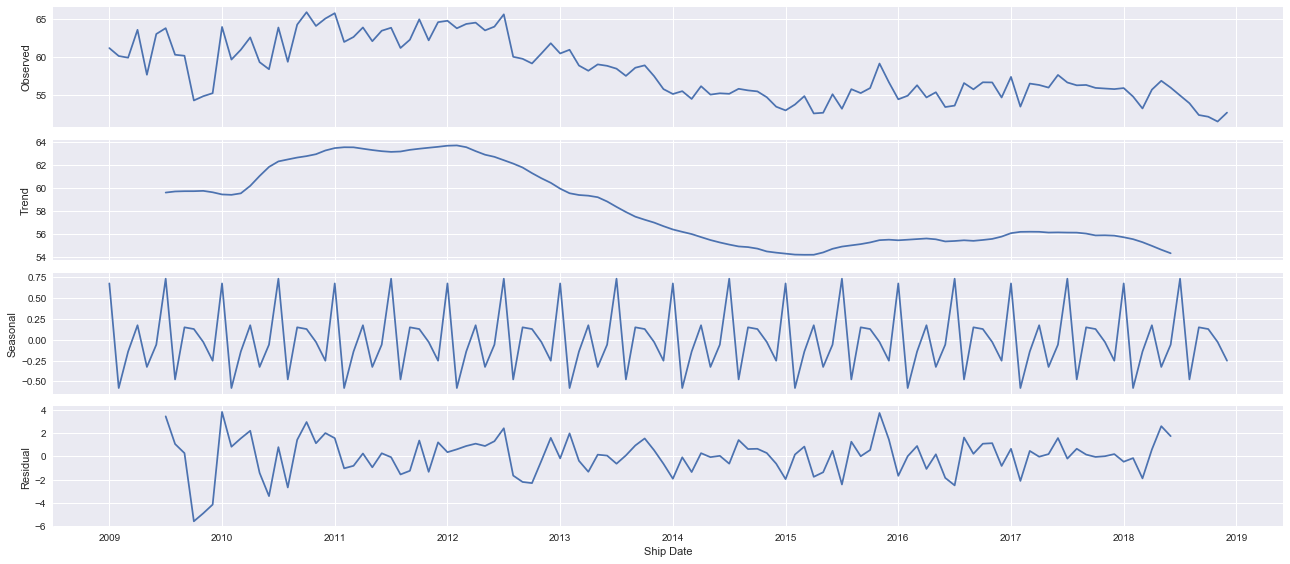

In [107]:
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(monthlyPercentMargin, model='additive')
fig = decomposition.plot()
plt.show()

## Times Series to Forecast Margin
This section we would predict the overall margin.
### ARIMA Model

In [109]:
import statsmodels.api as sm
# This is the monthly margin for the last 10 years. 2009 - 2018
monthlyPercentMargin.head()

Ship Date
2009-01-01    61.161228
2009-02-01    60.121910
2009-03-01    59.903203
2009-04-01    63.555560
2009-05-01    57.666454
Freq: MS, dtype: float64

Below we setup the combination of the ARIMA parameters that account for seasonality, trend, and noise in the data. These parameters are denoted as ARIMA(p, d, q).

In [110]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


The step below uses a 'grid search' to find the optimal set of parameters that will give the best performance for the model that will forecast the margins.

In [54]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y3['sum'],
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:3282.9613995955115
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:2620.210158481362
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:2980.847506806413
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:2956.5970401947343
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:2647.9522896486465
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:2621.5064128426257
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:3608.4034126249567
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:3224.9251579350034
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:2907.165489632482
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:2573.7749046599583
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:3274.2186559558604
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:3215.687418552949
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:2627.4900342082624
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:2575.7646401801458
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:2858.036263779486
ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:2543.688005916253
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:2885.968935138363
ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:2856.934829690792


The below combination yeilds the lowest AIC

ARIMA(1, 1, 1)x(0, 1, 1, 12)12 - AIC:2497.980946291798


Now, we would use the combination with the lowes AIC and create our forecasting model.

In [55]:
mod = sm.tsa.statespace.SARIMAX(y3['sum'],
                                order=(1, 1, 1),
                                seasonal_order=(0, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3436      0.303     -1.134      0.257      -0.938       0.250
ma.L1         -0.1685      0.282     -0.598      0.550      -0.720       0.383
ma.S.L12      -0.6375      0.091     -6.984      0.000      -0.816      -0.459
sigma2      3.055e+10   9.66e-13   3.16e+22      0.000    3.05e+10    3.05e+10


D:\Masters\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


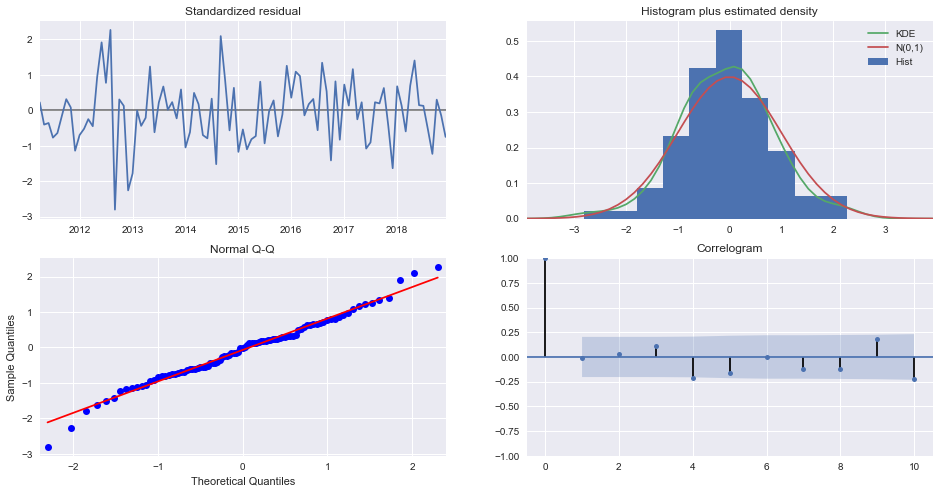

In [84]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

The residuals of our model seem to be normaly distributed. There is nothing suggesting that the model might depart from the assumptions needed for ARIMA model to provide a useful information.

On the plot below we have the comparison between the observed values for 2018 and the predicted values (red). The Yellow shadow are represents the 95% confidence inteval for the prediction.

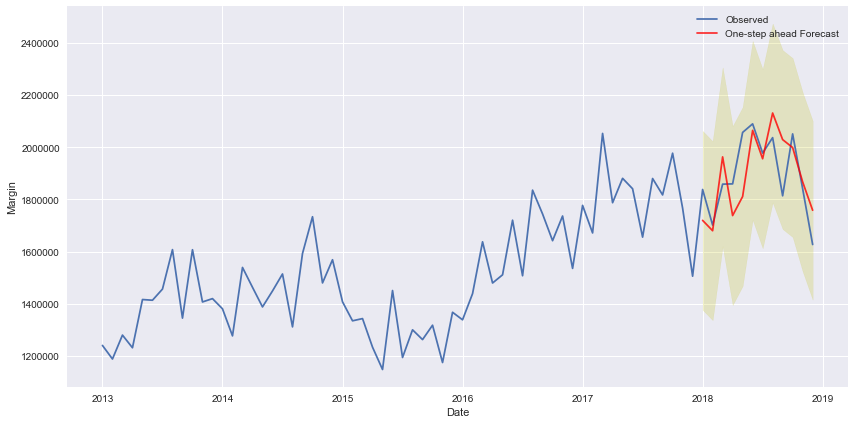

In [96]:
pred = results.get_prediction(start=pd.to_datetime('2018-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = y3['2013':]['sum'].plot(label='Observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', color='r',alpha=.8, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='y', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Margin')
plt.legend()
plt.show()

In [94]:
y_forecasted = pred.predicted_mean
y_truth = y3['2018-01-01':]['sum']
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 14780880348.2


For the year 2018 that we have predicted we found that the RMSE is within $121,576.64 of the real margins. 

In [95]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 121576.64


Below we will forecast 24 month starting from 2019. As we can see the CI starts to become wider as we depart from the real data. 

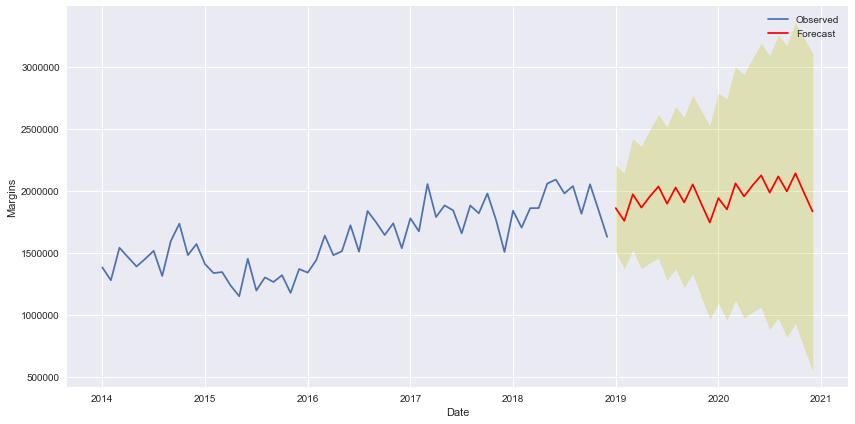

In [92]:
pred_uc = results.get_forecast(steps=24)
pred_ci = pred_uc.conf_int()
ax = y3['2014':]['sum'].plot(label='Observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast', color='r')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='y', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Margins')
plt.legend()
plt.show()

Section to have the ARIMA for with the negative and ouliers removed

In [111]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y3P['sum'],
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:3278.8625492365923
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:2628.6106872127143
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:2973.1238206147746
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:2948.9280768698195
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:2653.487021200897
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:2629.8326972993527
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:3602.53313600231
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:3221.263784030728
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:2914.189245903772
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:2583.6097700418204
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:3268.80985643379
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:3210.3551087115143
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:2636.6354298070864
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:2585.156164375082
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:2887.649466473862
ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:2567.506059935696
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:2911.141824744842
ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:2885.207413695323
ARIM

Selected parameters with the lowest AIC  
ARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:2508.6076982807026

In [112]:
mod = sm.tsa.statespace.SARIMAX(y3P['sum'],
                                order=(0, 1, 1),
                                seasonal_order=(0, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.5752      0.118     -4.868      0.000      -0.807      -0.344
ma.S.L12      -0.6362      0.081     -7.815      0.000      -0.796      -0.477
sigma2       3.65e+10   9.37e-13   3.89e+22      0.000    3.65e+10    3.65e+10


D:\Masters\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


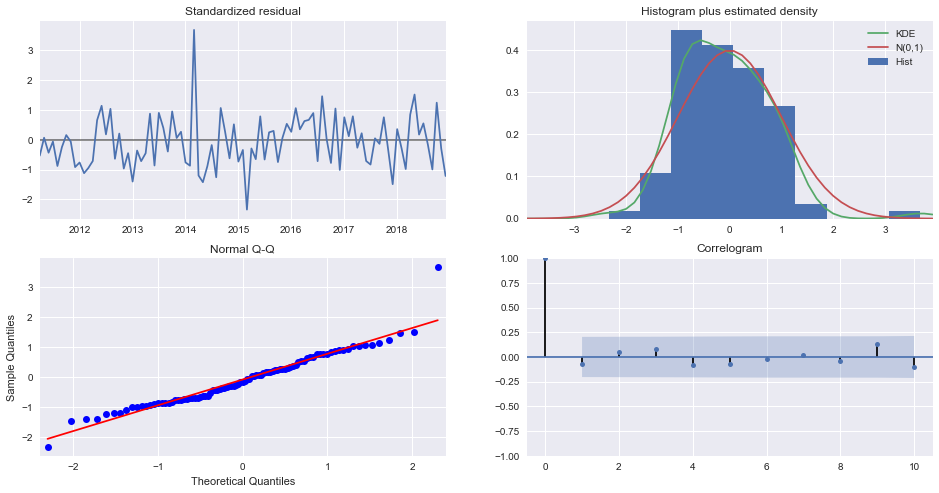

In [113]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

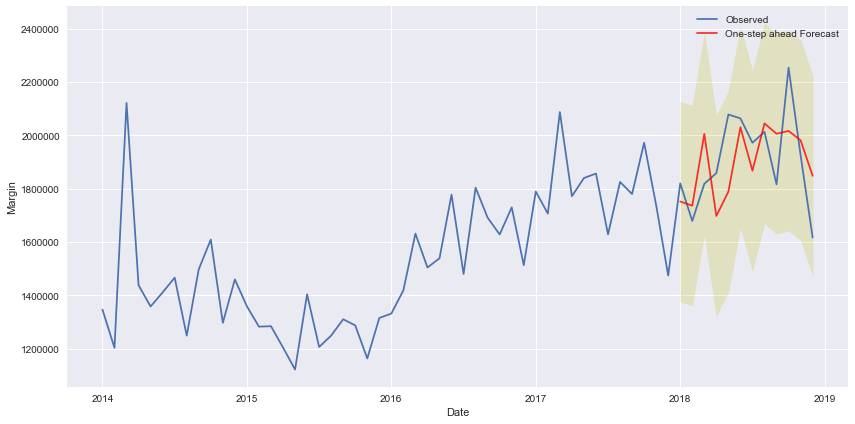

In [119]:
pred = results.get_prediction(start=pd.to_datetime('2018-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = y3P['2014':]['sum'].plot(label='Observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', color='r',alpha=.8, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='y', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Margin')
plt.legend()
plt.show()

In [115]:
y_forecasted = pred.predicted_mean
y_truth = y3P['2018-01-01':]['sum']
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 26245119535.11


In [116]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 162003.46


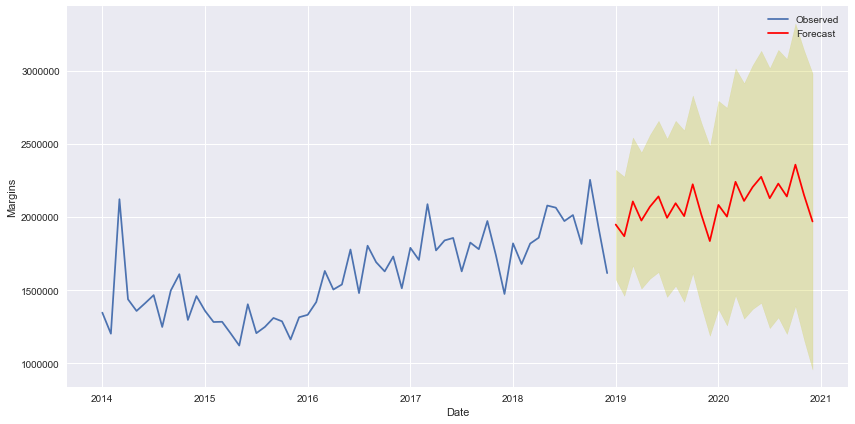

In [120]:
pred_uc = results.get_forecast(steps=24)
pred_ci = pred_uc.conf_int()
ax = y3P['2014':]['sum'].plot(label='Observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast', color='r')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='y', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Margins')
plt.legend()
plt.show()

Forecast for Percent of margin

In [121]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(monthlyPercentMargin,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1067.3084233743955
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:467.3143237381784
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:557.521853465638
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:553.5833002987353
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:472.02510966417424
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:465.6956581983517
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:1142.807321578091
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:919.7550144704451
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:512.1107002743026
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:426.413817122173
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:519.616672075518
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:507.97608709026935
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:434.482086855278
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:427.8642954270963
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:419.6911851195976
ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:394.2854040611316
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:426.4152910095245
ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:419.90098775540287
ARIMA(0, 1

D:\Masters\Anaconda\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:399.89306568658617
ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:476.5439988202063
ARIMA(1, 0, 1)x(0, 1, 1, 12)12 - AIC:375.73443689400733
ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:409.34943301594893
ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:401.75113026510974
ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:381.65013858493376
ARIMA(1, 0, 1)x(1, 1, 1, 12)12 - AIC:379.10424259288254
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:499.6302466858478
ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:404.9484400863886
ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:482.3182014356334
ARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC:381.1756560695949
ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:404.95104145925865
ARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:406.7424142893022
ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:383.85935965487744
ARIMA(1, 1, 0)x(1, 1, 1, 12)12 - AIC:383.77913434582035
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:491.10643836310857
ARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC:397.2493528415549
ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:476.5380136777527


Lowest AIC for Percent Margin  
ARIMA(1, 0, 1)x(0, 1, 1, 12)12 - AIC:375.73443689400733

In [122]:
mod = sm.tsa.statespace.SARIMAX(monthlyPercentMargin,
                                order=(1, 0, 1),
                                seasonal_order=(0, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9479      0.044     21.641      0.000       0.862       1.034
ma.L1         -0.4648      0.105     -4.423      0.000      -0.671      -0.259
ma.S.L12      -0.3776      0.082     -4.619      0.000      -0.538      -0.217
sigma2         2.9192      0.493      5.925      0.000       1.954       3.885


D:\Masters\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


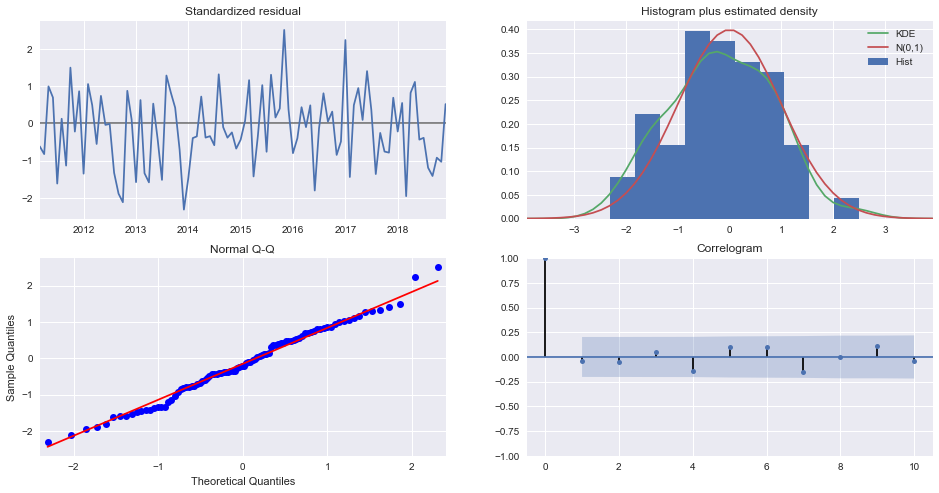

In [123]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

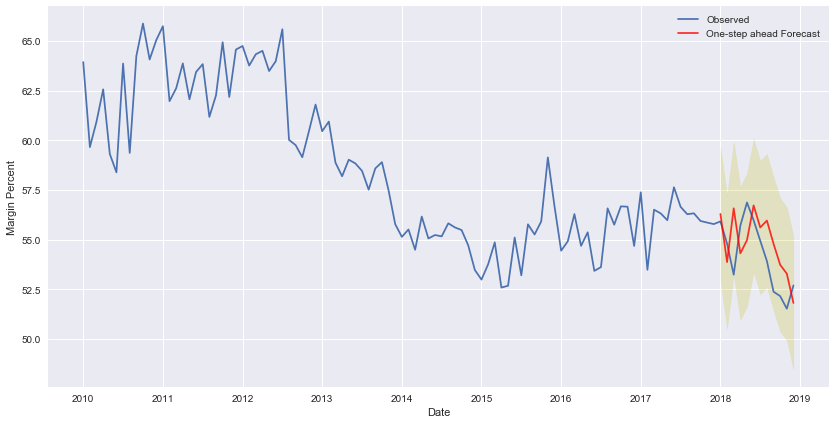

In [129]:
pred = results.get_prediction(start=pd.to_datetime('2018-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = monthlyPercentMargin['2010':].plot(label='Observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', color='r',alpha=.8, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='y', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Margin Percent')
plt.legend()
plt.show()

In [126]:
y_forecasted = pred.predicted_mean
y_truth = monthlyPercentMargin['2018-01-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 2.92


In [127]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 1.71


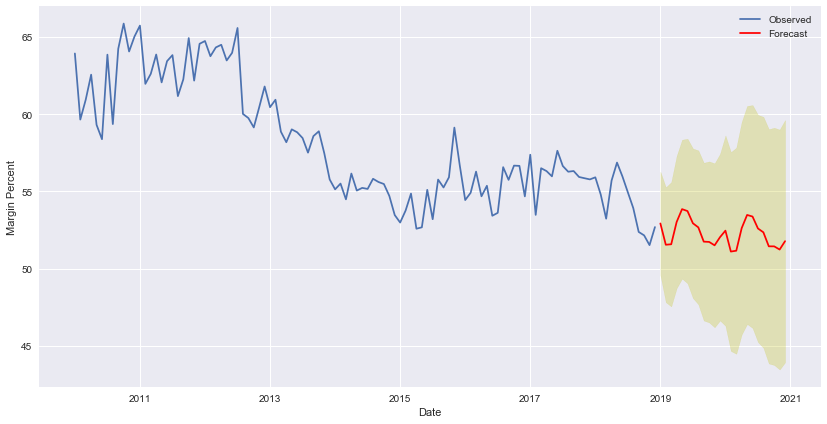

In [130]:
pred_uc = results.get_forecast(steps=24)
pred_ci = pred_uc.conf_int()
ax = monthlyPercentMargin['2010':].plot(label='Observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast', color='r')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='y', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Margin Percent')
plt.legend()
plt.show()

### LSTM for Regression


In [104]:

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

Using TensorFlow backend.


ModuleNotFoundError: No module named 'tensorflow'

### Customer Trends

In [ ]:
customerTs_df = salesTs_df[['Ship Date',
                        'Customer#',
                        'Price each',
                        'itemMargin',
                        'Qty']]
customerTs_df['Ship Date'] = pd.to_datetime(customerTs_df['Ship Date'])

In [ ]:
customerTs_df=customerTs_df.set_index('Ship Date')
## Remove dates outside the range provided in the data
customerTs_df = customerTs_df[(customerTs_df.index >= '2009-1-1') & (customerTs_df.index <= '2018-12-31')]

In [ ]:
customerTs_df.head()

In [ ]:
customerTs_df.shape

In [ ]:
marginByCustomer=customerTs_df.groupby(['Customer#']).sum().reset_index().sort_values(by=(['itemMargin']), ascending=False)
marginByCustomer['runningMargin']=np.cumsum(marginByCustomer['itemMargin'])
marginByCustomer['CdfCustomer'] = 100 * marginByCustomer['runningMargin']/marginByCustomer['itemMargin'].sum()

In [ ]:
marginByCustomer

** 5 % (63 customers)  of the total customer (1284) contribute to 80 % of the total margin **

In [ ]:
y=marginByCustomer
plt.xticks(rotation='vertical')
plt.bar(y['Customer#'].values ,y['itemMargin'].values )
plt.plot(y['Customer#'].values ,y['runningMargin'].values, color='orange', linewidth=1 )

In [ ]:
y=marginByCustomer[marginByCustomer['CdfCustomer'] <= 80]

plt.bar(y['Customer#'].values ,y['itemMargin'].values )


In [ ]:
topCustomersTs_df=customerTs_df[customerTs_df['Customer#'].isin(y['Customer#'])]

In [ ]:
topCustomersTs_df.shape

In [ ]:
topCustomersTsAgg_df=topCustomersTs_df.groupby(['Ship Date','Customer#']).sum().reset_index().sort_values(by=(['Ship Date']), ascending=False)
topCustomersTsAgg_df['Ship Date'] = pd.to_datetime(topCustomersTsAgg_df['Ship Date'])

In [ ]:
topCustomersTsAgg_df=topCustomersTsAgg_df.set_index('Ship Date')
topCustomersTsAgg_df['Year'] = topCustomersTsAgg_df.index.year
topCustomersTsAgg_df['Month'] = topCustomersTsAgg_df.index.month
topCustomersTsAgg_df['WeekdayName'] = topCustomersTsAgg_df.index.weekday_name
topCustomersTsAgg_df=topCustomersTsAgg_df.reset_index()
topCustomersTsAgg_df.head()

In [ ]:
#table = pivot_table(df, values='D', index=['A', 'B'],
#...                     columns=['C'], aggfunc=np.sum)
topCustomersTable = pd.pivot_table(topCustomersTsAgg_df, values='itemMargin',index=['Year','Month'],columns=['Customer#'])

In [ ]:
topCustomersTable=topCustomersTable.reset_index()
topCustomersTable.head()

#### Top Customer Margin Plot

In [ ]:
# multiple line plot
for column in topCustomersTable:
    plt.plot(topCustomersTable.index, topCustomersTable[column], marker='', color='grey', linewidth=1)


plt.plot(topCustomersTable.index, topCustomersTable['210'],marker='', color='orange', linewidth=1)

** Individual Margin Plots by Customer **

In [ ]:

i=1
l=1
for col in topCustomersTable.columns:
    if col not in ['index', 'Year', 'Month']:
        if i<=2:
            #plt.figure(figsize=(10,4))
            plt.subplot(1,2,i)
            plt.plot(topCustomersTable[col],marker='', color='orange', linewidth=2)
            plt.xlabel('Time', size=10)
            plt.title('Customer#: ' + col, size=25)
            plt.ylabel('Margin', size=20)
            plt.xticks(size=20)
            plt.yticks(size=15)
            i = i + 1
            #if l >= 5:
            #    i = i + 1
            #    l = 1
            #l = l + 1
        else:

            plt.subplots_adjust(top=1, bottom=0.1, left=0.03, right=1.8, hspace=2, wspace=.5)
            plt.show()

            i=1
            plt.subplot(1,2,i)
            plt.plot(topCustomersTable[col],marker='', color='orange', linewidth=2)
            plt.xlabel('Time', size=10)
            plt.title('Customer#: ' + col, size=25)
            plt.ylabel('Margin', size=20)
            plt.xticks(size=7)
            plt.yticks(size=15)
            i = i + 1
            #if l >= 5:
            #    i = i + 1
            #    l = 1
            #l = l + 1


        

plt.subplots_adjust(top=1, bottom=0.1, left=0.03, right=1.8, hspace=2, wspace=.5)
plt.show() 

In [ ]:

i=1
l=1
for col in topCustomersTable.columns:
    if col in ['210', 'A15216', 'A1740', 'K100', '100']:
        if i<=2:
            #plt.figure(figsize=(10,4))
            plt.subplot(1,2,i)
            plt.plot(topCustomersTable[col],marker='', color='orange', linewidth=2)
            plt.xlabel('Time', size=10)
            plt.title('Customer#: ' + col, size=25)
            plt.ylabel('Margin', size=20)
            plt.xticks(size=20)
            plt.yticks(size=15)
            i = i + 1
            #if l >= 5:
            #    i = i + 1
            #    l = 1
            #l = l + 1
        else:

            plt.subplots_adjust(top=1, bottom=0.1, left=0.03, right=1.8, hspace=2, wspace=.5)
            plt.show()

            i=1
            plt.subplot(1,2,i)
            plt.plot(topCustomersTable[col],marker='', color='orange', linewidth=2)
            plt.xlabel('Time', size=10)
            plt.title('Customer#: ' + col, size=25)
            plt.ylabel('Margin', size=20)
            plt.xticks(size=7)
            plt.yticks(size=15)
            i = i + 1
            #if l >= 5:
            #    i = i + 1
            #    l = 1
            #l = l + 1


        

plt.subplots_adjust(top=1, bottom=0.1, left=0.03, right=1.8, hspace=2, wspace=.5)
plt.show() 